In [1]:
import pandas as pd

In [120]:
df = pd.read_csv("non-clean-usage.csv")

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79848 entries, 0 to 79847
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       79848 non-null  int64  
 1   Subscription Code                79848 non-null  object 
 2   Flow Rate (l/s)                  33377 non-null  float64
 3   Number of Negative Flows         79848 non-null  int64  
 4   Percentage of Negative Flows     79848 non-null  float64
 5   Operating Hours (h)              41304 non-null  float64
 6   Consumption (m³)                 47081 non-null  float64
 7   Number of Available Data Points  79848 non-null  int64  
 8   تعداد مورد انتظار                79848 non-null  int64  
 9   درصد اطلاعات موجود               79848 non-null  float64
 10  month                            79848 non-null  object 
dtypes: float64(5), int64(4), object(2)
memory usage: 6.7+ MB


In [122]:
79848 / 36

2218.0

In [124]:
df.drop(columns=["Unnamed: 0"],inplace=True)

In [125]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
try:
    import missingno as msno
except ImportError:
    msno = None

class DataCleaner:
    """
    A powerful data cleaning module to detect missing values, outliers, and anomalies in a DataFrame.
    """
    def __init__(self, df):
        self.df = df.copy()

    def report_missing(self):
        missing_count = self.df.isnull().sum()
        missing_percent = 100 * missing_count / len(self.df)
        missing_df = pd.DataFrame({
            'missing_count': missing_count,
            'missing_percent': missing_percent
        })
        print("=== Missing Data Report ===")
        display(missing_df)

    def visualize_missing(self):
        print("=== Visualizing Missing Data ===")
        plt.figure(figsize=(12,6))
        sns.heatmap(self.df.isnull(), cbar=False, cmap='viridis')
        plt.title('Missing Data Heatmap')
        plt.show()
        if msno:
            msno.matrix(self.df, figsize=(12,4), sparkline=True)
            plt.show()

    def report_outliers(self, numeric_cols=None, method='iqr', z_thresh=3.0):
        if numeric_cols is None:
            numeric_cols = self.df.select_dtypes(include=[np.number]).columns.tolist()

        outlier_summary = []
        for col in numeric_cols:
            series = self.df[col].dropna().astype(float)
            if series.empty:
                continue
            if method == 'zscore':
                mean, std = series.mean(), series.std()
                z_scores = np.abs((series - mean) / std)
                num_outliers = (z_scores > z_thresh).sum()
            else:  # IQR method
                q1, q3 = series.quantile([0.25, 0.75])
                iqr = q3 - q1
                lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
                num_outliers = ((series < lower) | (series > upper)).sum()
            outlier_summary.append({
                'column': col,
                'outliers': num_outliers,
                'total_values': len(series)
            })

        outlier_df = pd.DataFrame(outlier_summary)
        print("=== Outliers Report ===")
        display(outlier_df)

    def report_anomalies(self, numeric_cols=None):
        print("=== Anomaly Detection ===")
        self.report_missing()
        self.report_outliers(numeric_cols=numeric_cols)

    def impute_missing(self, strategy='median'):
        df = self.df.copy()
        for col in df.columns:
            if df[col].isnull().any():
                if strategy == 'mean':
                    fill_val = df[col].mean()
                elif strategy == 'mode':
                    fill_val = df[col].mode().iloc[0]
                else:
                    fill_val = df[col].median()
                df[col].fillna(fill_val, inplace=True)
        return df

    def cap_outliers(self, numeric_cols=None):
        df = self.df.copy()
        if numeric_cols is None:
            numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
        for col in numeric_cols:
            series = df[col]
            q1, q3 = series.quantile([0.25, 0.75])
            iqr = q3 - q1
            lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
            df[col] = series.clip(lower, upper)
        return df

    def clean(self,
              impute_strategy='median',
              outlier_method='iqr',
              z_thresh=3.0,
              numeric_cols=None):
        """
        Perform full cleaning:
        1. Report anomalies (missing + outliers)
        2. Visualize missing data
        3. Impute missing values
        4. Cap outliers
        Returns a cleaned DataFrame.
        """
        # Step 1: Reports
        self.report_anomalies(numeric_cols=numeric_cols)
        self.visualize_missing()

        # Step 2: Imputation
        df_clean = self.impute_missing(strategy=impute_strategy)

        # Step 3: Outlier capping
        cleaner = DataCleaner(df_clean)
        if outlier_method in ['zscore', 'iqr']:
            cleaner.df = df_clean
            df_clean = cleaner.cap_outliers(numeric_cols=numeric_cols)

        print("=== Data cleaning complete ===")
        return df_clean

# Example usage:
# cleaner = DataCleaner(df)
# df_clean = cleaner.clean(impute_strategy='median', outlier_method='iqr')


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79848 entries, 0 to 79847
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Subscription Code                79848 non-null  object 
 1   Flow Rate (l/s)                  33377 non-null  float64
 2   Number of Negative Flows         79848 non-null  int64  
 3   Percentage of Negative Flows     79848 non-null  float64
 4   Operating Hours (h)              41304 non-null  float64
 5   Consumption (m³)                 47081 non-null  float64
 6   Number of Available Data Points  79848 non-null  int64  
 7   تعداد مورد انتظار                79848 non-null  int64  
 8   درصد اطلاعات موجود               79848 non-null  float64
 9   month                            79848 non-null  object 
dtypes: float64(5), int64(3), object(2)
memory usage: 6.1+ MB


In [127]:
def convert_to_object(df, cols):
    """
    Convert specified columns in the DataFrame to object dtype.
    Parameters:
        df (pd.DataFrame): The DataFrame to modify.
        cols (list of str): List of column names to convert.
    Returns:
        pd.DataFrame: The DataFrame with specified columns as object dtype.
    """
    for col in cols:
        if col in df.columns:
            df[col] = df[col].astype(object)
        else:
            print(f"Warning: Column '{col}' not found in DataFrame.")
    return df


In [128]:
cleaner = DataCleaner(df[['Consumption (m³)','Flow Rate (l/s)','Operating Hours (h)']])

=== Visualizing Missing Data ===


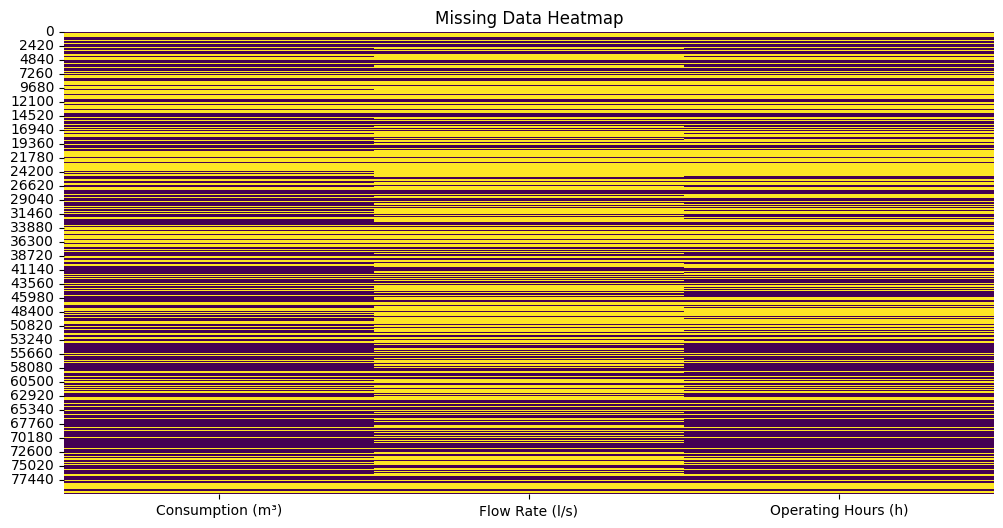

In [129]:
cleaner.visualize_missing()

In [130]:
info = pd.read_csv("data/1401_claean_info.csv")

In [131]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2218 entries, 0 to 2217
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         2218 non-null   int64  
 1   Subscription Code                  2218 non-null   object 
 2   License Type                       1567 non-null   object 
 3   County                             2218 non-null   object 
 4   Meter Serial                       2218 non-null   float64
 5   Meter Size                         2218 non-null   float64
 6   Installation Date                  2218 non-null   object 
 7   Last Connection Time               2112 non-null   object 
 8   Consumption in Period (m³)         1319 non-null   float64
 9   Operating Hours in Period (h)      1200 non-null   float64
 10  Average Flow Rate in Period (l/s)  1181 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 190.7+ 

In [132]:
cleaner.report_missing()

=== Missing Data Report ===


,missing_count,missing_percent
Consumption (m³),32767,41.036720
Flow Rate (l/s),46471,58.199329
Operating Hours (h),38544,48.271716


In [133]:
info_copy = info.copy()
info_copy['Installation_Year'] = info['Installation Date'].str.split('/').str[0]
info_copy['Installation_Month'] = info['Installation Date'].str.split('/').str[0] + "/" + info['Installation Date'].str.split('/').str[1]

In [134]:
info_copy

,Unnamed: 0,Subscription Code,License Type,County,Meter Serial,Meter Size,Installation Date,Last Connection Time,Consumption in Period (m³),Operating Hours in Period (h),Average Flow Rate in Period (l/s),Installation_Year,Installation_Month
0,1,520009,صنعتی,مشهد,9.098011e+11,50.0,1402/11/15,1404/01/28 - 03:07:28,NaN,NaN,NaN,1402,1402/11
1,2,200654,کشاورزی,قوچان,9.098010e+11,80.0,1400/02/12,1404/01/28 - 02:08:15,23879.930,343575.4,1.15,1400,1400/02
2,3,622162,کشاورزی,تربت حیدریه,9.098011e+11,50.0,1403/02/27,1403/09/08 - 03:10:09,NaN,NaN,NaN,1403,1403/02
3,4,515618,کشاورزی,مشهد,9.098010e+11,125.0,1400/02/30,1404/01/28 - 02:10:25,103922.600,475073.2,6.91,1400,1400/02
4,5,529232,کشاورزی,مشهد,9.098010e+11,125.0,1401/06/23,1404/01/28 - 02:11:21,84159.690,68022.1,6.00,1401,1401/06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2213,2214,925247,کشاورزی,باخرز,9.098010e+11,50.0,1400/03/24,1404/01/28 - 02:10:01,5685.400,56574.8,3.30,1400,1400/03
2214,2215,518473,کشاورزی,مشهد,9.098010e+11,100.0,1399/06/03,1404/01/28 - 03:01:20,250173.700,909533.1,12.28,1399,1399/06
2215,2216,201250,NaN,قوچان,9.098010e+11,50.0,1399/07/07,1404/01/28 - 02:10:42,8595.251,3673.9,2.66,1399,1399/07
2216,2217,925005,کشاورزی,باخرز,9.098010e+11,100.0,1400/03/03,1403/07/29 - 02:04:50,338274.800,437856.7,30.17,1400,1400/03


=== Visualizing Missing Data ===


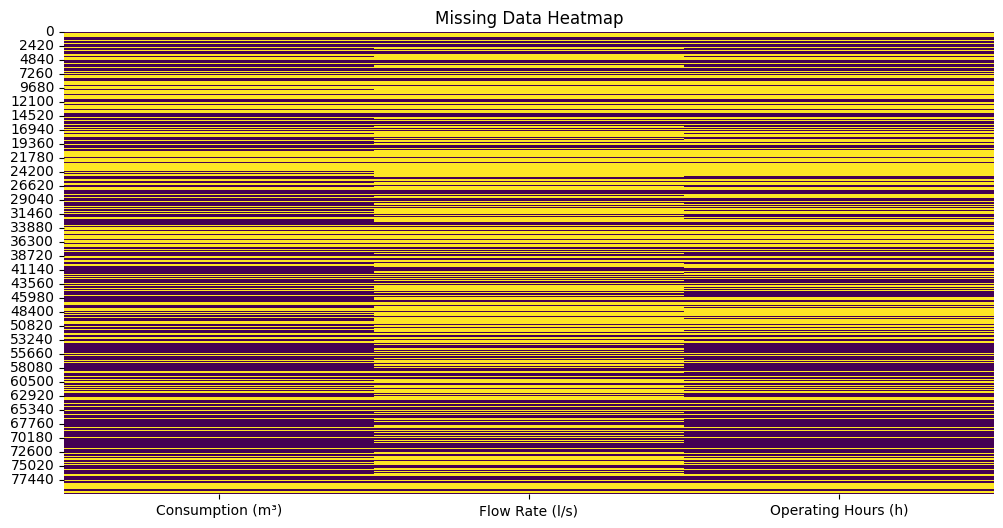

In [135]:
cleaner.visualize_missing()

<Axes: xlabel='Installation_Year', ylabel='Count'>

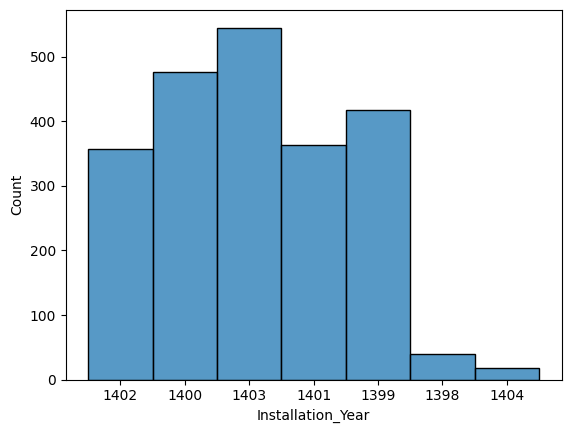

In [136]:
sns.histplot(info_copy['Installation_Year'])

In [137]:
import plotly.express as px

In [138]:
px.histogram(info_copy['Installation_Month'].sort_values(),title="تعداد کنتور های نصب شده در هر ماه")

In [139]:
import pandas as pd
import plotly.graph_objects as go

# مرحله 1: شمارش کنتورها بر اساس سال نصب
install_counts = info_copy['Installation_Year'].value_counts().sort_index()
df_counts = install_counts.reset_index()
df_counts.columns = ['Year', 'Count']

# مرحله 2: محاسبه تغییرات سالانه
df_counts['Change'] = df_counts['Count'].diff().fillna(0).astype(int)
df_counts['Change(%)'] = df_counts['Count'].pct_change().fillna(0) * 100
df_counts['Label'] = df_counts['Count'].astype(str) + "<br>" + df_counts['Change(%)'].round(1).astype(str) + "%"

# مرحله 3: رسم نمودار
fig = go.Figure()

# Bar chart for count
fig.add_trace(go.Bar(
    x=df_counts['Year'],
    y=df_counts['Count'],
    text=df_counts['Label'],
    textposition='outside',
    name='تعداد نصب',
    marker_color='indigo'
))

# مرحله 4: تنظیمات نهایی
fig.update_layout(
    title='تعداد کنتورهای نصب‌شده در هر سال',
    xaxis_title='سال نصب',
    yaxis_title='تعداد',
    yaxis_tickformat=',',
    font=dict(size=14),
    height=600
)

fig.show()


In [140]:
import pandas as pd
import plotly.graph_objects as go

# آماده‌سازی داده‌ها
install_counts = info_copy['Installation_Year'].value_counts().sort_index()
df_counts = install_counts.reset_index()
df_counts.columns = ['Year', 'Count']
df_counts['Change(%)'] = df_counts['Count'].pct_change().fillna(0) * 100
df_counts['Year'] = df_counts['Year'].astype(int)
# رسم نمودار اصلی
fig = go.Figure()

fig.add_trace(go.Bar(
    x=df_counts['Year'],
    y=df_counts['Count'],
    text=df_counts['Count'],
    textposition='outside',
    name='تعداد نصب',
    #marker_color='indigo'
    
))

# افزودن annotation‌ها با فلش و درصد تغییرات
for i in range(1, len(df_counts)):
    x0 = df_counts['Year'][i - 1]
    x1 = df_counts['Year'][i]
    y0 = df_counts['Count'][i - 1]
    y1 = df_counts['Count'][i]
    mid_x = (x0 + x1) / 2
    mid_y = max(y0, y1) + 100  # موقعیت فلش کمی بالاتر از ستون‌ها

    change = df_counts['Change(%)'][i]
    color = "green" if change >= 0 else "red"
    arrow_dir = "⬆" if change >= 0 else "⬇"
    arrow_text = f"{arrow_dir} {abs(change):.1f}%"

    fig.add_annotation(
        x=mid_x,
        y=mid_y,
        text=arrow_text,
        # showarrow=True,
        arrowhead=2,
        arrowsize=1,
        arrowwidth=1.5,
        arrowcolor=color,
        font=dict(color=color, size=13),
        ax=0,
        ay=-40  # جهت فلش به پایین
    )

# تنظیمات ظاهری
fig.update_layout(
    title='تعداد کنتورهای نصب‌شده در هر سال ',
    xaxis_title='سال نصب',
    yaxis_title='تعداد',
    yaxis_tickformat=',',
    font=dict(size=14),
    height=650
)

fig.show()


In [141]:
fig = px.histogram(info_copy['Installation_Year'].sort_values(),title="تعداد کنتور های نصب شده در هر سال",text_auto=True)
fig.add_annotation()

اضافه کردن میزان درصد کاهش یا افزایش فروش کنتور ها به نمودار بالا با جزییات عددی

In [68]:
def calculate_meter_age():
    """
    Calculate meter age in years based on the 'Installation Date' column.
    Adds a new column 'meter_age_years' to the info_copy DataFrame.
    """
    # Parse installation dates into datetime, invalid dates become NaT
    info_copy['Installation_Date_dt'] = pd.to_datetime(
        info_copy['Installation Date'],
        format='%Y/%m/%d',
        errors='coerce'
    )
    # Today's date
    today = pd.Timestamp.today()
    # Compute base age by year difference
    info_copy['meter_age_years'] = today.year - info_copy['Installation_Date_dt'].dt.year
    # Subtract one year where installation month/day is after today's month/day
    mask = (
        (info_copy['Installation_Date_dt'].dt.month > today.month) |
        (
            (info_copy['Installation_Date_dt'].dt.month == today.month) &
            (info_copy['Installation_Date_dt'].dt.day > today.day)
        )
    )
    info_copy.loc[mask, 'meter_age_years'] -= 1
    return info_copy


In [69]:
info_copy['Meter Size'] = info_copy['Meter Size'].astype(dtype="object")

In [144]:
info_copy.drop(columns=['Unnamed: 0'],inplace=True)

In [145]:
info_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2218 entries, 0 to 2217
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Subscription Code                  2218 non-null   object 
 1   License Type                       1567 non-null   object 
 2   County                             2218 non-null   object 
 3   Meter Serial                       2218 non-null   float64
 4   Meter Size                         2218 non-null   float64
 5   Installation Date                  2218 non-null   object 
 6   Last Connection Time               2112 non-null   object 
 7   Consumption in Period (m³)         1319 non-null   float64
 8   Operating Hours in Period (h)      1200 non-null   float64
 9   Average Flow Rate in Period (l/s)  1181 non-null   float64
 10  Installation_Year                  2218 non-null   object 
 11  Installation_Month                 2218 non-null   objec

In [146]:
info_copy['Meter Serial'] = info_copy['Meter Serial'].astype(dtype="object")

In [147]:
info_copy["License Type"].fillna("unknow",inplace=True)

/tmp/ipykernel_298767/2999746949.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [148]:
merged = info_copy[["Subscription Code","License Type","Installation_Year","Installation_Month","County","Meter Serial","Meter Size"]].merge(df,on="Subscription Code")

In [149]:
df["Subscription Code"].value_counts()

Subscription Code
111111         252
زندان مرکزی     72
517227          72
541280          72
514564          72
              ... 
806441          36
604749          36
910367          36
100628          36
102290          36
Name: count, Length: 2201, dtype: int64

In [150]:
info_copy[info_copy['Subscription Code'] == "111111"]

,Subscription Code,License Type,County,Meter Serial,Meter Size,Installation Date,Last Connection Time,Consumption in Period (m³),Operating Hours in Period (h),Average Flow Rate in Period (l/s),Installation_Year,Installation_Month
867,111111,unknow,مشهد,909801032852.0,80.0,1400/01/28,1404/01/28 - 02:10:49,3316.235,15223.8,6.27,1400,1400/01
869,111111,unknow,مشهد,909801033219.0,100.0,1400/01/28,1404/01/28 - 02:08:46,144957.100,1329418.4,8.60,1400,1400/01
870,111111,unknow,مشهد,909801033221.0,100.0,1400/01/28,1404/01/28 - 02:08:07,209512.600,2076372.8,8.78,1400,1400/01
871,111111,unknow,مشهد,909801033229.0,80.0,1400/01/28,1404/01/28 - 00:44:00,195455.000,180577.6,3.00,1400,1400/01
872,111111,unknow,مشهد,909801033313.0,80.0,1400/01/28,1404/01/28 - 00:40:37,68429.120,1185099.7,3.11,1400,1400/01
873,111111,unknow,مشهد,909801033641.0,50.0,1400/01/28,1404/01/27 - 02:08:11,4065.521,67798.4,0.91,1400,1400/01
1737,111111,unknow,نیشابور,909801032629.0,150.0,1399/04/19,1404/01/18 - 02:10:47,NaN,NaN,NaN,1399,1399/04


In [151]:
import numpy as np

In [152]:
df[df['Subscription Code'] == "111111"]

,Subscription Code,Flow Rate (l/s),Number of Negative Flows,Percentage of Negative Flows,Operating Hours (h),Consumption (m³),Number of Available Data Points,تعداد مورد انتظار,درصد اطلاعات موجود,month
867,111111,6.32,0,0.0,915.7,268.31,31,31,100.0,1401/01
869,111111,8.08,0,0.0,67666.7,10846.60,31,31,100.0,1401/01
870,111111,7.43,0,0.0,122179.0,15459.00,31,31,100.0,1401/01
871,111111,3.05,0,0.0,68675.2,4959.32,31,31,100.0,1401/01
872,111111,3.05,0,0.0,53752.1,5091.54,31,31,100.0,1401/01
...,...,...,...,...,...,...,...,...,...,...
78500,111111,5.93,0,0.0,480.4,9962.40,30,30,100.0,1403/12
78501,111111,NaN,0,0.0,NaN,NaN,0,30,0.0,1403/12
78502,111111,NaN,0,0.0,NaN,NaN,0,30,0.0,1403/12
78503,111111,NaN,0,0.0,NaN,NaN,0,30,0.0,1403/12


In [153]:
non_unique_subs = info_copy['Subscription Code'].value_counts().head(12)

In [154]:
non_unique_subs.index

Index(['111111', 'زندان مرکزی', '517227', '541280', '514564', '514702',
       '516377', '517048', '222222', '514711', 'چاه شماره 13', '529179'],
      dtype='object', name='Subscription Code')

In [155]:
non_uniques = df[df['Subscription Code'].isin(non_unique_subs.index)]

In [156]:
non_uniques[non_uniques['Consumption (m³)'] < 0]['Subscription Code'].value_counts()

Subscription Code
111111    45
514702     6
514711     2
529179     1
Name: count, dtype: int64

In [157]:
non_uniques.to_csv("non_unique_subscrition_codes.csv")

In [158]:
df_copy = df.copy()
df_copy.fillna("missing",inplace=True)

/tmp/ipykernel_298767/2794258824.py:2: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'missing' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



In [159]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79848 entries, 0 to 79847
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Subscription Code                79848 non-null  object 
 1   Flow Rate (l/s)                  79848 non-null  object 
 2   Number of Negative Flows         79848 non-null  int64  
 3   Percentage of Negative Flows     79848 non-null  float64
 4   Operating Hours (h)              79848 non-null  object 
 5   Consumption (m³)                 79848 non-null  object 
 6   Number of Available Data Points  79848 non-null  int64  
 7   تعداد مورد انتظار                79848 non-null  int64  
 8   درصد اطلاعات موجود               79848 non-null  float64
 9   month                            79848 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 6.1+ MB


In [160]:
info_copy.drop_duplicates(subset=["Subscription Code"],inplace=True)

In [161]:
df_copy = df.copy()

In [162]:
non_unique_subs.index.tolist()

['111111',
 'زندان مرکزی',
 '517227',
 '541280',
 '514564',
 '514702',
 '516377',
 '517048',
 '222222',
 '514711',
 'چاه شماره 13',
 '529179']

In [163]:
non_unique_subs

Subscription Code
111111          7
زندان مرکزی     2
517227          2
541280          2
514564          2
514702          2
516377          2
517048          2
222222          2
514711          2
چاه شماره 13    2
529179          2
Name: count, dtype: int64

In [164]:
df_copy = df_copy[~df_copy['Subscription Code'].isin(non_unique_subs.index)]

In [165]:
df_copy

,Subscription Code,Flow Rate (l/s),Number of Negative Flows,Percentage of Negative Flows,Operating Hours (h),Consumption (m³),Number of Available Data Points,تعداد مورد انتظار,درصد اطلاعات موجود,month
0,520009,NaN,0,0.0,NaN,NaN,0,31,0.0,1401/01
1,200654,1.38,0,0.0,16492.8,2727.77,31,31,100.0,1401/01
2,622162,NaN,0,0.0,NaN,NaN,0,31,0.0,1401/01
3,515618,7.05,0,0.0,29319.6,14647.50,31,31,100.0,1401/01
4,529232,NaN,0,0.0,NaN,NaN,0,31,0.0,1401/01
...,...,...,...,...,...,...,...,...,...,...
79843,925247,NaN,0,0.0,NaN,NaN,0,30,0.0,1403/12
79844,518473,5.44,0,0.0,9.8,177.14,30,30,100.0,1403/12
79845,201250,NaN,0,0.0,0.0,0.00,30,30,100.0,1403/12
79846,925005,NaN,0,0.0,NaN,NaN,0,30,0.0,1403/12


In [166]:
df_copy = df_copy.merge(info_copy[["Subscription Code","License Type","Installation_Year","Installation_Month","County","Meter Serial","Meter Size"]],on='Subscription Code',how='outer',validate="many_to_one")

In [167]:
df_copy

,Subscription Code,Flow Rate (l/s),Number of Negative Flows,Percentage of Negative Flows,Operating Hours (h),Consumption (m³),Number of Available Data Points,تعداد مورد انتظار,درصد اطلاعات موجود,month,License Type,Installation_Year,Installation_Month,County,Meter Serial,Meter Size
0,تبادل چاه شماره 6,NaN,0.0,0.0,NaN,NaN,0.0,31.0,0.0,1401/01,شرب شهری,1401,1401/12,کاشمر,909801048652.0,150.0
1,تبادل چاه شماره 6,NaN,0.0,0.0,NaN,NaN,0.0,31.0,0.0,1401/02,شرب شهری,1401,1401/12,کاشمر,909801048652.0,150.0
2,تبادل چاه شماره 6,NaN,0.0,0.0,NaN,NaN,0.0,31.0,0.0,1401/03,شرب شهری,1401,1401/12,کاشمر,909801048652.0,150.0
3,تبادل چاه شماره 6,NaN,0.0,0.0,NaN,NaN,0.0,31.0,0.0,1401/04,شرب شهری,1401,1401/12,کاشمر,909801048652.0,150.0
4,تبادل چاه شماره 6,NaN,0.0,0.0,NaN,NaN,0.0,31.0,0.0,1401/05,شرب شهری,1401,1401/12,کاشمر,909801048652.0,150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78811,۶۰۳۱۶۴,NaN,0.0,0.0,0.0,0.000,30.0,30.0,100.0,1403/08,unknow,1403,1403/10,تربت حیدریه,909801065187.0,125.0
78812,۶۰۳۱۶۴,NaN,0.0,0.0,0.0,0.000,30.0,30.0,100.0,1403/09,unknow,1403,1403/10,تربت حیدریه,909801065187.0,125.0
78813,۶۰۳۱۶۴,NaN,0.0,0.0,0.0,0.000,30.0,30.0,100.0,1403/10,unknow,1403,1403/10,تربت حیدریه,909801065187.0,125.0
78814,۶۰۳۱۶۴,17.46,0.0,0.0,114.6,7076.918,30.0,30.0,100.0,1403/11,unknow,1403,1403/10,تربت حیدریه,909801065187.0,125.0


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79848 entries, 0 to 79847
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Subscription Code                79848 non-null  object 
 1   Flow Rate (l/s)                  33377 non-null  float64
 2   Number of Negative Flows         79848 non-null  int64  
 3   Percentage of Negative Flows     79848 non-null  float64
 4   Operating Hours (h)              41304 non-null  float64
 5   Consumption (m³)                 47081 non-null  float64
 6   Number of Available Data Points  79848 non-null  int64  
 7   تعداد مورد انتظار                79848 non-null  int64  
 8   درصد اطلاعات موجود               79848 non-null  float64
 9   month                            79848 non-null  object 
dtypes: float64(5), int64(3), object(2)
memory usage: 6.1+ MB


In [170]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2218 entries, 0 to 2217
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         2218 non-null   int64  
 1   Subscription Code                  2218 non-null   object 
 2   License Type                       1567 non-null   object 
 3   County                             2218 non-null   object 
 4   Meter Serial                       2218 non-null   float64
 5   Meter Size                         2218 non-null   float64
 6   Installation Date                  2218 non-null   object 
 7   Last Connection Time               2112 non-null   object 
 8   Consumption in Period (m³)         1319 non-null   float64
 9   Operating Hours in Period (h)      1200 non-null   float64
 10  Average Flow Rate in Period (l/s)  1181 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 190.7+ 

In [171]:
info["Meter Size"] = info["Meter Size"].astype("object")

اصلاح نمودار سایز کنتور 

In [172]:
px.histogram(info_copy['Meter Size'],title="(بدلیل اندک بودن تعداد کنتور های سایز 250 به بالا از نمایش آنها صرف نظر شده است )تقسیم بندی بر اساس سایز کنتور",text_auto = True,nbins=12)

In [173]:
info_copy["Meter Size"].value_counts()

Meter Size
50.0     719
150.0    483
100.0    265
125.0    243
80.0     182
200.0    144
15.0      93
25.0      22
20.0      21
40.0      12
250.0      8
300.0      5
400.0      3
350.0      1
Name: count, dtype: int64

In [174]:
df_copy['month'] = df_copy['month'].astype("str")

In [175]:
df_copy['Year'] = df_copy['month'].str.split('/').str[0]

In [176]:
df_copy

,Subscription Code,Flow Rate (l/s),Number of Negative Flows,Percentage of Negative Flows,Operating Hours (h),Consumption (m³),Number of Available Data Points,تعداد مورد انتظار,درصد اطلاعات موجود,month,License Type,Installation_Year,Installation_Month,County,Meter Serial,Meter Size,Year
0,تبادل چاه شماره 6,NaN,0.0,0.0,NaN,NaN,0.0,31.0,0.0,1401/01,شرب شهری,1401,1401/12,کاشمر,909801048652.0,150.0,1401
1,تبادل چاه شماره 6,NaN,0.0,0.0,NaN,NaN,0.0,31.0,0.0,1401/02,شرب شهری,1401,1401/12,کاشمر,909801048652.0,150.0,1401
2,تبادل چاه شماره 6,NaN,0.0,0.0,NaN,NaN,0.0,31.0,0.0,1401/03,شرب شهری,1401,1401/12,کاشمر,909801048652.0,150.0,1401
3,تبادل چاه شماره 6,NaN,0.0,0.0,NaN,NaN,0.0,31.0,0.0,1401/04,شرب شهری,1401,1401/12,کاشمر,909801048652.0,150.0,1401
4,تبادل چاه شماره 6,NaN,0.0,0.0,NaN,NaN,0.0,31.0,0.0,1401/05,شرب شهری,1401,1401/12,کاشمر,909801048652.0,150.0,1401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78811,۶۰۳۱۶۴,NaN,0.0,0.0,0.0,0.000,30.0,30.0,100.0,1403/08,unknow,1403,1403/10,تربت حیدریه,909801065187.0,125.0,1403
78812,۶۰۳۱۶۴,NaN,0.0,0.0,0.0,0.000,30.0,30.0,100.0,1403/09,unknow,1403,1403/10,تربت حیدریه,909801065187.0,125.0,1403
78813,۶۰۳۱۶۴,NaN,0.0,0.0,0.0,0.000,30.0,30.0,100.0,1403/10,unknow,1403,1403/10,تربت حیدریه,909801065187.0,125.0,1403
78814,۶۰۳۱۶۴,17.46,0.0,0.0,114.6,7076.918,30.0,30.0,100.0,1403/11,unknow,1403,1403/10,تربت حیدریه,909801065187.0,125.0,1403


In [103]:
fig3_1 = px.bar(df_copy[df_copy['Consumption (m³)'] > 0].groupby(by = "Meter Size").sum(),
x='Meter Size',
y='Consumption in Period (m³)',
color = 'Year',
title='تقسیم بندی میزان مصرف سالانه هر سایز کنتور',
height=800) # Adjusted height
fig3_1.update_layout(xaxis_tickangle=-60) # Rotated more for potentially long county names
fig3_1.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['Subscription Code', 'Flow Rate (l/s)', 'Number of Negative Flows', 'Percentage of Negative Flows', 'Operating Hours (h)', 'Consumption (m³)', 'Number of Available Data Points', 'تعداد مورد انتظار', 'درصد اطلاعات موجود', 'month', 'License Type', 'Installation_Year', 'Installation_Month', 'County', 'Meter Serial', 'Year'] but received: Meter Size

In [ ]:
df_copy

,Unnamed: 0,Subscription Code,Flow Rate (l/s),Number of Negative Flows,Percentage of Negative Flows,Operating Hours (h),Consumption (m³),Number of Available Data Points,تعداد مورد انتظار,درصد اطلاعات موجود,month,License Type,Installation_Year,Installation_Month,County,Meter Serial,Meter Size,Year
0,159.0,تبادل چاه شماره 6,NaN,0.0,0.0,NaN,NaN,0.0,31.0,0.0,2022-03-21,شرب شهری,1401,1401/12,کاشمر,909801048652.0,150.0,2022-03-21
1,2377.0,تبادل چاه شماره 6,NaN,0.0,0.0,NaN,NaN,0.0,31.0,0.0,2022-04-21,شرب شهری,1401,1401/12,کاشمر,909801048652.0,150.0,2022-04-21
2,4595.0,تبادل چاه شماره 6,NaN,0.0,0.0,NaN,NaN,0.0,31.0,0.0,2022-05-22,شرب شهری,1401,1401/12,کاشمر,909801048652.0,150.0,2022-05-22
3,6813.0,تبادل چاه شماره 6,NaN,0.0,0.0,NaN,NaN,0.0,31.0,0.0,2022-06-22,شرب شهری,1401,1401/12,کاشمر,909801048652.0,150.0,2022-06-22
4,9031.0,تبادل چاه شماره 6,NaN,0.0,0.0,NaN,NaN,0.0,31.0,0.0,2022-07-23,شرب شهری,1401,1401/12,کاشمر,909801048652.0,150.0,2022-07-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78811,17553.0,۶۰۳۱۶۴,NaN,0.0,0.0,0.0,0.000,30.0,30.0,100.0,2024-10-22,unknow,1403,1403/10,تربت حیدریه,909801065187.0,125.0,2024-10-22
78812,19771.0,۶۰۳۱۶۴,NaN,0.0,0.0,0.0,0.000,30.0,30.0,100.0,2024-11-21,unknow,1403,1403/10,تربت حیدریه,909801065187.0,125.0,2024-11-21
78813,21989.0,۶۰۳۱۶۴,NaN,0.0,0.0,0.0,0.000,30.0,30.0,100.0,2024-12-21,unknow,1403,1403/10,تربت حیدریه,909801065187.0,125.0,2024-12-21
78814,24207.0,۶۰۳۱۶۴,17.46,0.0,0.0,114.6,7076.918,30.0,30.0,100.0,2025-01-20,unknow,1403,1403/10,تربت حیدریه,909801065187.0,125.0,2025-01-20


In [ ]:
df_copy['Consumption (m³)'].sort_values(ascending=False).head(20)

31122    1.056914e+09
43515    1.475204e+07
34119    1.463384e+07
21123    1.287978e+07
52662    1.126934e+07
20543    1.051086e+07
34118    1.013104e+07
18898    9.383144e+06
46269    9.152365e+06
1113     8.956969e+06
10534    8.599025e+06
43496    8.366018e+06
31167    7.511823e+06
43514    7.424083e+06
46273    7.044367e+06
14747    6.700465e+06
60800    6.313857e+06
23713    6.195904e+06
46270    6.192674e+06
69089    5.988232e+06
Name: Consumption (m³), dtype: float64

In [177]:
least_consumptions = df_copy['Consumption (m³)'].sort_values(ascending=True).head(20)

In [178]:
df_copy.iloc[31122]

Subscription Code                          516918
Flow Rate (l/s)                              1.61
Number of Negative Flows                      0.0
Percentage of Negative Flows                  0.0
Operating Hours (h)                   559208364.0
Consumption (m³)                     1056914195.2
Number of Available Data Points              31.0
تعداد مورد انتظار                            31.0
درصد اطلاعات موجود                          100.0
month                                     1402/01
License Type                               unknow
Installation_Year                            1399
Installation_Month                        1399/04
County                                       مشهد
Meter Serial                       909801032486.0
Meter Size                                   50.0
Year                                         1402
Name: 31122, dtype: object

In [179]:
df_copy

,Subscription Code,Flow Rate (l/s),Number of Negative Flows,Percentage of Negative Flows,Operating Hours (h),Consumption (m³),Number of Available Data Points,تعداد مورد انتظار,درصد اطلاعات موجود,month,License Type,Installation_Year,Installation_Month,County,Meter Serial,Meter Size,Year
0,تبادل چاه شماره 6,NaN,0.0,0.0,NaN,NaN,0.0,31.0,0.0,1401/01,شرب شهری,1401,1401/12,کاشمر,909801048652.0,150.0,1401
1,تبادل چاه شماره 6,NaN,0.0,0.0,NaN,NaN,0.0,31.0,0.0,1401/02,شرب شهری,1401,1401/12,کاشمر,909801048652.0,150.0,1401
2,تبادل چاه شماره 6,NaN,0.0,0.0,NaN,NaN,0.0,31.0,0.0,1401/03,شرب شهری,1401,1401/12,کاشمر,909801048652.0,150.0,1401
3,تبادل چاه شماره 6,NaN,0.0,0.0,NaN,NaN,0.0,31.0,0.0,1401/04,شرب شهری,1401,1401/12,کاشمر,909801048652.0,150.0,1401
4,تبادل چاه شماره 6,NaN,0.0,0.0,NaN,NaN,0.0,31.0,0.0,1401/05,شرب شهری,1401,1401/12,کاشمر,909801048652.0,150.0,1401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78811,۶۰۳۱۶۴,NaN,0.0,0.0,0.0,0.000,30.0,30.0,100.0,1403/08,unknow,1403,1403/10,تربت حیدریه,909801065187.0,125.0,1403
78812,۶۰۳۱۶۴,NaN,0.0,0.0,0.0,0.000,30.0,30.0,100.0,1403/09,unknow,1403,1403/10,تربت حیدریه,909801065187.0,125.0,1403
78813,۶۰۳۱۶۴,NaN,0.0,0.0,0.0,0.000,30.0,30.0,100.0,1403/10,unknow,1403,1403/10,تربت حیدریه,909801065187.0,125.0,1403
78814,۶۰۳۱۶۴,17.46,0.0,0.0,114.6,7076.918,30.0,30.0,100.0,1403/11,unknow,1403,1403/10,تربت حیدریه,909801065187.0,125.0,1403


In [180]:
df_copy[df_copy['Subscription Code'] == "516918"]

,Subscription Code,Flow Rate (l/s),Number of Negative Flows,Percentage of Negative Flows,Operating Hours (h),Consumption (m³),Number of Available Data Points,تعداد مورد انتظار,درصد اطلاعات موجود,month,License Type,Installation_Year,Installation_Month,County,Meter Serial,Meter Size,Year
31110,516918,2.32,0.0,0.0,24318.7,4.204583e+04,31.0,31.0,100.0,1401/01,unknow,1399,1399/04,مشهد,909801032486.0,50.0,1401
31111,516918,2.29,0.0,0.0,21183.7,2.593640e+03,31.0,31.0,100.0,1401/02,unknow,1399,1399/04,مشهد,909801032486.0,50.0,1401
31112,516918,1.87,0.0,0.0,44844.2,2.933110e+03,31.0,31.0,100.0,1401/03,unknow,1399,1399/04,مشهد,909801032486.0,50.0,1401
31113,516918,1.61,0.0,0.0,7107.8,6.163000e+02,31.0,31.0,100.0,1401/04,unknow,1399,1399/04,مشهد,909801032486.0,50.0,1401
31114,516918,2.09,0.0,0.0,39487.8,1.391270e+03,31.0,31.0,100.0,1401/05,unknow,1399,1399/04,مشهد,909801032486.0,50.0,1401
31115,516918,2.13,0.0,0.0,34311.3,1.382490e+03,31.0,31.0,100.0,1401/06,unknow,1399,1399/04,مشهد,909801032486.0,50.0,1401
31116,516918,2.20,0.0,0.0,86.7,9.750500e+02,30.0,30.0,100.0,1401/07,unknow,1399,1399/04,مشهد,909801032486.0,50.0,1401
31117,516918,2.19,0.0,0.0,7401.1,1.409460e+03,30.0,30.0,100.0,1401/08,unknow,1399,1399/04,مشهد,909801032486.0,50.0,1401
31118,516918,2.19,0.0,0.0,7128.3,8.395900e+02,30.0,30.0,100.0,1401/09,unknow,1399,1399/04,مشهد,909801032486.0,50.0,1401
31119,516918,2.18,0.0,0.0,6928.0,1.073750e+03,30.0,30.0,100.0,1401/10,unknow,1399,1399/04,مشهد,909801032486.0,50.0,1401


In [181]:
df_copy = df_copy[df_copy['Consumption (m³)'] < 1000000]

In [182]:
df_copy

,Subscription Code,Flow Rate (l/s),Number of Negative Flows,Percentage of Negative Flows,Operating Hours (h),Consumption (m³),Number of Available Data Points,تعداد مورد انتظار,درصد اطلاعات موجود,month,License Type,Installation_Year,Installation_Month,County,Meter Serial,Meter Size,Year
9,تبادل چاه شماره 6,NaN,0.0,0.0,NaN,0.000,20.0,30.0,66.67,1401/10,شرب شهری,1401,1401/12,کاشمر,909801048652.0,150.0,1401
10,تبادل چاه شماره 6,NaN,0.0,0.0,NaN,0.000,30.0,30.0,100.00,1401/11,شرب شهری,1401,1401/12,کاشمر,909801048652.0,150.0,1401
11,تبادل چاه شماره 6,10.60,0.0,0.0,NaN,196.861,29.0,29.0,100.00,1401/12,شرب شهری,1401,1401/12,کاشمر,909801048652.0,150.0,1401
12,تبادل چاه شماره 6,8.20,0.0,0.0,18.7,517.494,31.0,31.0,100.00,1402/01,شرب شهری,1401,1401/12,کاشمر,909801048652.0,150.0,1402
13,تبادل چاه شماره 6,11.90,0.0,0.0,417.3,11086.635,31.0,31.0,100.00,1402/02,شرب شهری,1401,1401/12,کاشمر,909801048652.0,150.0,1402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78811,۶۰۳۱۶۴,NaN,0.0,0.0,0.0,0.000,30.0,30.0,100.00,1403/08,unknow,1403,1403/10,تربت حیدریه,909801065187.0,125.0,1403
78812,۶۰۳۱۶۴,NaN,0.0,0.0,0.0,0.000,30.0,30.0,100.00,1403/09,unknow,1403,1403/10,تربت حیدریه,909801065187.0,125.0,1403
78813,۶۰۳۱۶۴,NaN,0.0,0.0,0.0,0.000,30.0,30.0,100.00,1403/10,unknow,1403,1403/10,تربت حیدریه,909801065187.0,125.0,1403
78814,۶۰۳۱۶۴,17.46,0.0,0.0,114.6,7076.918,30.0,30.0,100.00,1403/11,unknow,1403,1403/10,تربت حیدریه,909801065187.0,125.0,1403


In [183]:
info_copy

,Subscription Code,License Type,County,Meter Serial,Meter Size,Installation Date,Last Connection Time,Consumption in Period (m³),Operating Hours in Period (h),Average Flow Rate in Period (l/s),Installation_Year,Installation_Month
0,520009,صنعتی,مشهد,909801058196.0,50.0,1402/11/15,1404/01/28 - 03:07:28,NaN,NaN,NaN,1402,1402/11
1,200654,کشاورزی,قوچان,909801034787.0,80.0,1400/02/12,1404/01/28 - 02:08:15,23879.930,343575.4,1.15,1400,1400/02
2,622162,کشاورزی,تربت حیدریه,909801061701.0,50.0,1403/02/27,1403/09/08 - 03:10:09,NaN,NaN,NaN,1403,1403/02
3,515618,کشاورزی,مشهد,909801035022.0,125.0,1400/02/30,1404/01/28 - 02:10:25,103922.600,475073.2,6.91,1400,1400/02
4,529232,کشاورزی,مشهد,909801046032.0,125.0,1401/06/23,1404/01/28 - 02:11:21,84159.690,68022.1,6.00,1401,1401/06
...,...,...,...,...,...,...,...,...,...,...,...,...
2213,925247,کشاورزی,باخرز,909801035013.0,50.0,1400/03/24,1404/01/28 - 02:10:01,5685.400,56574.8,3.30,1400,1400/03
2214,518473,کشاورزی,مشهد,909801032684.0,100.0,1399/06/03,1404/01/28 - 03:01:20,250173.700,909533.1,12.28,1399,1399/06
2215,201250,unknow,قوچان,909801032982.0,50.0,1399/07/07,1404/01/28 - 02:10:42,8595.251,3673.9,2.66,1399,1399/07
2216,925005,کشاورزی,باخرز,909801035005.0,100.0,1400/03/03,1403/07/29 - 02:04:50,338274.800,437856.7,30.17,1400,1400/03


In [111]:
import pandas as pd
import plotly.express as px

def format_number(x):
    if abs(x) >= 1_000_000:
        return f"{x / 1_000_000:.1f}M"
    elif abs(x) >= 1_000:
        return f"{x / 1_000:.1f}K"
    else:
        return f"{x:.0f}"


df_county_consumption_data = infos


# --- 2.1 مجموع مصرف بر اساس شهرستان ---
print("Generating Bar Chart: Total Consumption by County using Plotly")
df_county_consumption_data = df.groupby('County', as_index=False)['Consumption (m³)'].sum()
df_county_consumption_data = df_county_consumption_data.sort_values(by='Consumption (m³)', ascending=False)
df_county_consumption_data['Formatted'] = df_county_consumption_data['Consumption (m³)'].apply(format_number)

if not df_county_consumption_data.empty:
    fig2_1 = px.bar(df_county_consumption_data,
                    x='County',
                    y='Consumption (m³)',
                    text='Formatted',
                    title='مجموع مصارف منفی در سال‌های 1401 تا 1403 بر اساس شهرستان',
                    labels={'Consumption (m³)': 'Total Consumption', 'County': 'County'},
                    height=700)
    fig2_1.update_traces(textposition='outside')
    fig2_1.update_layout(
        xaxis_tickangle=-45,
        yaxis_tickformat=".2s",
        font=dict(size=14),
        uniformtext_minsize=8,
        uniformtext_mode='hide'
    )
    fig2_1.show()

# --- 2.2 مجموع مصرف بر اساس نوع پروانه ---
print("Generating Bar Chart: Total Consumption by License Type using Plotly")
df_license_consumption_data = df.groupby('License Type', as_index=False)['Consumption (m³)'].sum()
df_license_consumption_data = df_license_consumption_data.sort_values(by='Consumption (m³)', ascending=False)
df_license_consumption_data['Formatted'] = df_license_consumption_data['Consumption (m³)'].apply(format_number)

if not df_license_consumption_data.empty:
    fig2_2 = px.bar(df_license_consumption_data,
                    x='License Type',
                    y='Consumption (m³)',
                    text='Formatted',
                    title='مجموع مصارف منفی در سال‌های 1401 تا 1403 بر اساس نوع پروانه',
                    labels={'Consumption (m³)': 'Total Consumption', 'License Type': 'License Type'},
                    height=600)
    fig2_2.update_traces(textposition='outside')
    fig2_2.update_layout(
        xaxis_tickangle=-45,
        yaxis_tickformat=".2s",
        font=dict(size=14),
        uniformtext_minsize=8,
        uniformtext_mode='hide'
    )
    fig2_2.show()

# --- 3. افزودن ستون سال ---
df_copy = df.copy()
# Assuming 'month' column contains data like '1401/MM/DD' or '1401/MM' for Persian years
df_copy['Year'] = df_copy['month'].str.split('/').str[0]

# --- 3.1 مصارف منفی بر اساس شهرستان و سال ---
print("Generating Grouped Bar Chart: Consumption by County and Year using Plotly")
df_county_year_consumption_data = df_copy.groupby(['County', 'Year'], as_index=False)['Consumption (m³)'].sum()
df_county_year_consumption_data['Formatted'] = df_county_year_consumption_data['Consumption (m³)'].apply(format_number)

if not df_county_year_consumption_data.empty:
    county_total_consumption_order = df_copy.groupby('County')['Consumption (m³)'].sum().sort_values(ascending=False).index
    df_county_year_consumption_data['County'] = pd.Categorical(df_county_year_consumption_data['County'], categories=county_total_consumption_order, ordered=True)
    df_county_year_consumption_data = df_county_year_consumption_data.sort_values(['County', 'Year'])

    fig3_1 = px.bar(df_county_year_consumption_data,
                    x='County',
                    y='Consumption (m³)',
                    color='Year',
                    barmode='group',
                    text='Formatted',
                    title='مصارف منفی در سال‌های 1401 تا 1403 بر اساس شهرستان‌های مختلف',
                    labels={'Consumption (m³)': 'Total Consumption', 'County': 'County', 'Year': 'Year'},
                    height=800)
    fig3_1.update_traces(textposition='outside')
    fig3_1.update_layout(
        xaxis_tickangle=-60,
        yaxis_tickformat=".2s",
        font=dict(size=14),
        uniformtext_minsize=8,
        uniformtext_mode='hide'
    )
    fig3_1.show()

# --- 3.2 مصارف منفی بر اساس نوع پروانه و سال ---
print("Generating Grouped Bar Chart: Consumption by License Type and Year using Plotly")
df_license_year_consumption_data = df_copy.groupby(['License Type', 'Year'], as_index=False)['Consumption (m³)'].sum()
df_license_year_consumption_data['Formatted'] = df_license_year_consumption_data['Consumption (m³)'].apply(format_number)

if not df_license_year_consumption_data.empty:
    license_total_consumption_order = df_copy.groupby('License Type')['Consumption (m³)'].sum().sort_values(ascending=False).index
    df_license_year_consumption_data['License Type'] = pd.Categorical(df_license_year_consumption_data['License Type'], categories=license_total_consumption_order, ordered=True)
    df_license_year_consumption_data = df_license_year_consumption_data.sort_values(['License Type', 'Year'])

    fig3_2 = px.bar(df_license_year_consumption_data,
                    x='License Type',
                    y='Consumption (m³)',
                    color='Year',
                    barmode='group',
                    text='Formatted',
                    title='مصارف منفی در سال‌های 1401 تا 1403 بر اساس نوع پروانه',
                    labels={'Consumption (m³)': 'Total Consumption', 'License Type': 'License Type', 'Year': 'Year'},
                    height=700)
    fig3_2.update_traces(textposition='outside')
    fig3_2.update_layout(
        xaxis_tickangle=-45,
        yaxis_tickformat=".2s",
        font=dict(size=14),
        uniformtext_minsize=8,
        uniformtext_mode='hide'
    )
    fig3_2.show()

# --- 3.3 مصارف منفی سالانه بر اساس سایز کنتور ---
print("Generating Grouped Bar Chart: Consumption by Meter Size and Year using Plotly")
# Assuming 'Meter Size' is a column in df_copy.
df_meter_year_consumption_data = df_copy.groupby(['Meter Size', 'Year'], as_index=False)['Consumption (m³)'].sum()
df_meter_year_consumption_data['Formatted'] = df_meter_year_consumption_data['Consumption (m³)'].apply(format_number)

if not df_meter_year_consumption_data.empty:
    # Order Meter Sizes by their total consumption across all years for consistent plot ordering
    meter_total_consumption_order = df_copy.groupby('Meter Size')['Consumption (m³)'].sum().sort_values(ascending=False).index
    df_meter_year_consumption_data['Meter Size'] = pd.Categorical(df_meter_year_consumption_data['Meter Size'], categories=meter_total_consumption_order, ordered=True)
    df_meter_year_consumption_data = df_meter_year_consumption_data.sort_values(['Meter Size', 'Year'])

    fig3_3 = px.bar(df_meter_year_consumption_data,
                    x='Meter Size',
                    y='Consumption (m³)',
                    color='Year',
                    barmode='group',
                    text='Formatted',
                    title='مصارف منفی سالانه در سال‌های 1401 تا 1403 بر اساس سایز کنتور',
                    labels={'Consumption (m³)': 'Total Consumption', 'Meter Size': 'Meter Size', 'Year': 'Year'},
                    height=700)
    fig3_3.update_traces(textposition='outside')
    fig3_3.update_layout(
        xaxis_tickangle=-45,
        yaxis_tickformat=".2s",
        font=dict(size=14),
        uniformtext_minsize=8,
        uniformtext_mode='hide',
        xaxis={'type': 'category'} # Ensure Meter Size is treated as categorical
    )
    fig3_3.show()

print("✅ All professional-quality plots have been generated.")


NameError: name 'infos' is not defined

In [113]:
# Aggregate annual consumption by meter size
df_meter_year = df_copy.groupby(['Meter Size', 'Year'], as_index=False)['Consumption in Period (m³)'].sum()

# Format numbers for display
df_meter_year['Formatted'] = df_meter_year['Consumption (m³)'].apply(format_number)

# Determine ordering of Meter Size by total consumption
meter_order = df_meter_year.groupby('Meter Size')['Consumption (m³)'] \
                           .sum() \
                           .sort_values(ascending=False) \
                           .index
df_meter_year['Meter Size'] = pd.Categorical(df_meter_year['Meter Size'],
                                             categories=meter_order,
                                             ordered=True)

# Sort for consistent plotting
df_meter_year = df_meter_year.sort_values(['Meter Size', 'Year'])

# Build grouped bar chart
fig3_1 = px.bar(df_meter_year,
                x='Meter Size',
                y='Consumption in Period (m³)',
                color='Year',
                barmode='group',
                text='Formatted',
                title='مصرف سالانه بر اساس سایز کنتور',
                labels={
                  'Meter Size': 'سایز کنتور',
                  'Consumption in Period (m³)': 'میزان مصرف (متر مکعب)',
                  'Year': 'سال'
                },
                height=800)

# Tweak layout and display
fig3_1.update_traces(textposition='outside')
fig3_1.update_layout(
    xaxis_tickangle=-60,
    yaxis_tickformat=".2s",
    font=dict(size=14),
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    xaxis={'type': 'category'}
)
fig3_1.show()


KeyError: 'Column not found: Consumption in Period (m³)'

In [184]:
infos = pd.read_csv("data/merged_info.csv") 

In [185]:
infos = infos[infos['Consumption in Period (m³)'] > 0]

In [186]:
infos = infos[infos['Consumption in Period (m³)'] < 1000000]

In [187]:
infos.describe()

,Unnamed: 0,Meter Serial,Meter Size,Consumption in Period (m³),Operating Hours in Period (h),Average Flow Rate in Period (l/s)
count,3888.000000,3.888000e+03,3888.000000,3888.000000,3.831000e+03,3634.000000
mean,1130.250257,9.101271e+11,98.647119,125313.072837,2.654242e+05,10.066901
std,637.554065,1.551182e+10,49.521206,180949.081426,7.379084e+05,33.821464
min,0.000000,1.001730e+11,15.000000,0.002000,0.000000e+00,0.100000
25%,584.750000,9.098010e+11,50.000000,3158.431500,1.095400e+03,2.070000
50%,1118.500000,9.098010e+11,100.000000,35922.430000,1.121580e+04,5.675000
75%,1686.250000,9.098010e+11,150.000000,189366.125000,1.890760e+05,14.680000
max,2217.000000,9.298010e+11,250.000000,997893.200000,1.721571e+07,1948.250000


In [ ]:
fig3_1 = ,
x='Meter Size',
y='Consumption (m³)',
color = 'Year',
title='تقسیم بندی میزان مصرف سالانه هر سایز کنتور',
height=800) # Adjusted height
fig3_1.update_layout(xaxis_tickangle=-60) # Rotated more for potentially long county names
fig3_1.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['Consumption (m³)'] but received: Meter Size

نمودار بالا به میزان مجموع مصرف کنتور های مختلف تغییر پیدا بکنه

تحیلیل دیتا های منفی

In [ ]:
# df_copy = df_copy[['Subscription Code', 'Flow Rate (l/s)', 'Number of Negative Flows',
#        'Percentage of Negative Flows', 'Operating Hours (h)',
#        'Consumption (m³)', 'Number of Available Data Points',
#        'تعداد مورد انتظار', 'درصد اطلاعات موجود', 'month', 'License Type_x',
#        'Installation_Year_x', 'Installation_Month_x', 'County_x',
#        'Meter Serial_x', 'Meter Size_x']]

In [190]:
fig3_1 = px.bar(df_copy[df_copy["Consumption (m³)"] < 0],
x='Installation_Year',
y='Consumption (m³)',
color='Meter Size',

title='میزان مصرف سالانه منفی و تقسیم بندی بر اساس سایز کنتور ',
height=700) # Adjusted height
fig3_1.update_layout(xaxis_tickangle=-45) 
fig3_1.show()

In [189]:
df_copy[df_copy["Consumption (m³)"] < 0]["Consumption (m³)"].sort_values()

31121   -1.056963e+09
69088   -7.339642e+06
70987   -2.696113e+06
16775   -2.293238e+06
33263   -2.188351e+06
             ...     
39670   -1.000000e-03
49905   -1.000000e-03
71033   -1.000000e-03
47572   -1.000000e-03
35975   -1.000000e-03
Name: Consumption (m³), Length: 3491, dtype: float64

In [ ]:
neg_hours = df_copy[df_copy["Operating Hours (h)"] > 744 ]

In [ ]:
neg_hours.describe()

جمع بندی :

اصلاح نمودار تعداد نصب کنتور در هر سال بر اساس درصد رشد یا کاهش 

نمودار مجموع مصارف در طی سه سال خراسان رضوی بر اساس سایز کنتور

حذف داده های پرت بسیار بزرگ )(anomally detection)

مجموع مصارف منفی و تمرکز بیشتر روی سایز کنتور

In [191]:
# analyzer.py
import pandas as pd
import plotly.express as px
import plotly.figure_factory as ff
import numpy as np
from scipy.stats import zscore, skew, kurtosis
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import warnings

# Ignore warnings for cleaner output in the app
warnings.filterwarnings('ignore')

class InteractiveDataAnalyzer:
    """
    A class to perform interactive data analysis and visualization
    using pandas and plotly. Simpler version with outlier plotting.
    """
    def __init__(self, df):
        if not isinstance(df, pd.DataFrame):
            raise TypeError("Input must be a pandas DataFrame.")
        # Work on a copy
        self._df = df.copy()
        # Attempt to convert potential object columns that are dates/numbers
        for col in self._df.columns:
             try:
                  self._df[col] = pd.to_numeric(self._df[col], errors='coerce')
             except:
                  try:
                       self._df[col] = pd.to_datetime(self._df[col], errors='coerce')
                  except:
                       # Convert remaining object columns to string for consistency in plotting/display
                       if pd.api.types.is_object_dtype(self._df[col]) or pd.api.types.is_categorical_dtype(self._df[col]):
                            self._df[col] = self._df[col].astype(str)
                       pass # Keep as is if conversion fails


    def get_data(self):
        """Returns the internal DataFrame."""
        return self._df

    def get_columns(self):
         """Returns a list of all column names."""
         return self._df.columns.tolist()

    def get_numeric_columns(self):
        """Returns a list of numeric column names."""
        numeric_cols = [col for col in self._df.columns if pd.api.types.is_numeric_dtype(self._df[col])]
        return numeric_cols

    def get_categorical_columns(self):
        """Returns a list of categorical (object/string/bool) column names."""
        categorical_cols = [col for col in self._df.columns if pd.api.types.is_object_dtype(self._df[col]) or pd.api.types.is_categorical_dtype(self._df[col]) or pd.api.types.is_bool_dtype(self._df[col])]
        return categorical_cols

    def get_datetime_columns(self):
        """Returns a list of datetime columns."""
        datetime_cols = [col for col in self._df.columns if pd.api.types.is_datetime64_any_dtype(self._df[col])]
        return datetime_cols


    def statistical_summary(self, column):
        """Returns basic descriptive statistics for a column."""
        if column not in self._df.columns:
            return "ستون یافت نشد."
        if column not in self.get_numeric_columns():
            return "ستون عددی نیست."
        return self._df[column].describe()

    def detailed_statistical_summary(self, column):
        """Returns detailed descriptive statistics including skewness and kurtosis."""
        if column not in self._df.columns:
            return "ستون یافت نشد."
        if column not in self.get_numeric_columns():
            return "ستون عددی نیست."

        col_data = self._df[column].dropna()
        if col_data.empty:
            return "ستون حاوی داده‌ای نیست."

        try:
            summary = {
                'Mean': col_data.mean(),
                'Median': col_data.median(),
                'Standard Deviation': col_data.std(),
                'Variance': col_data.var(),
                'Skewness (کجی)': skew(col_data),
                'Kurtosis (کشیدگی)': kurtosis(col_data),
                'Min': col_data.min(),
                'Max': col_data.max(),
                'Count': col_data.count(),
                'IQR (دامنه میان چارکی)': col_data.quantile(0.75) - col_data.quantile(0.25)
            }
        except Exception as e:
            return f"خطا در محاسبه آماره تفصیلی: {e}"

        return pd.Series(summary, name=column)

    def show_missing_values(self):
        """Returns a DataFrame showing the count of missing values per column."""
        missing_counts = self._df.isnull().sum()
        missing_percentage = (self._df.isnull().sum() / len(self._df)) * 100
        missing_df = pd.DataFrame({
            'تعداد مقادیر گمشده': missing_counts,
            'درصد گمشده (%)': missing_percentage
        })
        # Filter to show only columns with missing values and sort
        missing_df = missing_df[missing_df['تعداد مقادیر گمشده'] > 0].sort_values(by='تعداد مقادیر گمشده', ascending=False)
        return missing_df

    def find_negative_values(self, column):
        """Finds and returns rows where the specified numeric column has negative values."""
        if column not in self._df.columns or column not in self.get_numeric_columns():
            return pd.DataFrame(), "ستون یافت نشد یا عددی نیست."

        negative_rows = self._df[self._df[column] < 0].copy()
        if negative_rows.empty:
            return negative_rows, f"هیچ مقدار منفی در ستون '{column}' یافت نشد."
        else:
            return negative_rows, f"{len(negative_rows)} ردیف با مقدار منفی در ستون '{column}' یافت شد."


    # --- Plotting Methods (Simplified) ---

    def plot_histogram(self, column):
        """Generates a histogram for a numeric column."""
        if column not in self._df.columns or column not in self.get_numeric_columns():
            return None, "ستون یافت نشد یا عددی نیست."
        try:
            fig = px.histogram(self._df, x=column, title=f'توزیع {column}')
            return fig, None
        except Exception as e:
             return None, f"خطا در رسم هیستوگرام: {e}"


    def plot_boxplot(self, column):
        """Generates a boxplot for a numeric column."""
        if column not in self._df.columns or column not in self.get_numeric_columns():
            return None, "ستون یافت نشد یا عددی نیست."
        try:
            fig = px.box(self._df, y=column, title=f'باکس‌پلات {column}')
            return fig, None
        except Exception as e:
             return None, f"خطا در رسم باکس‌پلات: {e}"

    def plot_violin(self, column):
        """Generates a violin plot for a numeric column."""
        if column not in self._df.columns or column not in self.get_numeric_columns():
            return None, "ستون یافت نشد یا عددی نیست."
        try:
            fig = px.violin(self._df, y=column, title=f'ویولن‌پلات {column}')
            return fig, None
        except Exception as e:
             return None, f"خطا در رسم ویولن‌پلات: {e}"


    def plot_scatterplot(self, x_col, y_col, color_col=None):
        """Generates a scatter plot between two columns, optionally colored by a third column."""
        if x_col not in self._df.columns or y_col not in self._df.columns:
             return None, "ستون‌های X یا Y یافت نشدند."
        # Removed check for color_col existence to allow user to select any column for color
        try:
            fig = px.scatter(self._df, x=x_col, y=y_col, color=color_col,
                             title=f'نمودار پراکندگی: {y_col} در مقابل {x_col}' + (f' بر اساس {color_col}' if color_col else ''))
            return fig, None
        except Exception as e:
            return None, f"خطا در رسم نمودار پراکندگی: {e}"


    def plot_pairplot(self, columns=None): # Removed color_col
        """
        Generates a pair plot (scatter matrix) for multiple numeric columns.
        """
        numeric_cols_all = self.get_numeric_columns()
        if columns is None:
            # Limit columns for performance
            if len(numeric_cols_all) > 10:
                numeric_cols_to_plot = numeric_cols_all[:10]
            else:
                 numeric_cols_to_plot = numeric_cols_all
        else:
            numeric_cols_to_plot = [col for col in columns if col in numeric_cols_all]
            if not numeric_cols_to_plot:
                 return None, "هیچ ستون عددی معتبری برای رسم Pair Plot انتخاب نشد."
            # Ensure selected columns are actually in the dataframe


        if len(numeric_cols_to_plot) < 2:
            return None, "برای رسم Pair Plot حداقل به دو ستون عددی نیاز است."

        try:
             fig = px.scatter_matrix(self._df,
                                      dimensions=numeric_cols_to_plot,
                                      title='ماتریس پراکندگی (Pair Plot)')
             fig.update_layout(diagonal_visible=False)
             return fig, None
        except Exception as e:
             return None, f"خطا در رسم Pair Plot: {e}"


    def plot_average_monthly_trend(self, time_col, metric_col): # Removed group_by_col
        """
        Plots the average of a metric over a time column.
        Intended for data in long format like long_usage*.csv with 'month' column.
        """
        if time_col not in self._df.columns or metric_col not in self._df.columns:
            return None, "ستون زمان یا معیار یافت نشد."
        # Ensure time_col is datetime or can be sorted chronologically
        if time_col not in self.get_datetime_columns() and not (pd.api.types.is_object_dtype(self._df[time_col]) or pd.api.types.is_categorical_dtype(self._df[time_col])):
             return None, f"ستون زمان ('{time_col}') باید از نوع تاریخ یا دسته‌ای قابل مرتب‌سازی باشد."

        if metric_col not in self.get_numeric_columns():
             return None, "ستون معیار باید عددی باشد."

        group_cols = [time_col]
        df_agg = self._df.groupby(group_cols)[metric_col].mean().reset_index()

        # Sort explicitly by time_col, coercing errors for robustness
        try:
             df_agg[time_col] = pd.to_datetime(df_agg[time_col], errors='coerce')
             df_agg = df_agg.sort_values(by=time_col)
        except Exception as e:
             # st.warning moved to app.py
             df_agg = df_agg.sort_values(by=time_col) # Fallback to string sort

        try:
            fig = px.line(df_agg, x=time_col, y=metric_col,
                          title=f'روند میانگین {metric_col} در طول زمان ({time_col})')
            return fig, None
        except Exception as e:
            return None, f"خطا در رسم روند ماهانه: {e}"


    def plot_data_availability_trend(self, time_col='month', availability_col='Percentage of Available Data Points'): # Removed group_by_col
         """
         Plots the trend of average data availability percentage over time.
         Assumes the existence of 'month' and 'Percentage of Available Data Points' columns.
         Suitable for long_usage*.csv data.
         """
         if time_col not in self._df.columns or availability_col not in self._df.columns:
              return None, f"ستون‌های '{time_col}' یا '{availability_col}' یافت نشدند. این نمودار برای داده‌های ماهانه پردازش شده مناسب است."
         if availability_col not in self.get_numeric_columns():
              return None, f"ستون '{availability_col}' عددی نیست."

         group_cols = [time_col]
         df_agg = self._df.groupby(group_cols)[availability_col].mean().reset_index()
         # Sort explicitly by time_col, coercing errors for robustness
         try:
             df_agg[time_col] = pd.to_datetime(df_agg[time_col], errors='coerce')
             df_agg = df_agg.sort_values(by=time_col)
         except Exception as e:
             # st.warning moved to app.py
             df_agg = df_agg.sort_values(by=time_col) # Fallback


         try:
            fig = px.line(df_agg, x=time_col, y=availability_col,
                          title='روند میانگین درصد اطلاعات موجود در طول زمان')
            return fig, None
         except Exception as e:
             return None, f"خطا در رسم روند درصد موجودیت داده: {e}"


    def plot_consumption_vs_operating_hours(self, consumption_col='Consumption (m³)', hours_col='Operating Hours (h)'): # Removed group_by_col
         """
         Plots Consumption vs Operating Hours, highlighting the potential negative correlation issue.
         Assumes the existence of 'Consumption (m³)' and 'Operating Hours (h)' columns.
         Suitable for long_usage*.csv data.
         """
         if consumption_col not in self._df.columns or hours_col not in self._df.columns:
              return None, f"ستون‌های '{consumption_col}' یا '{hours_col}' یافت نشدند. این نمودار برای داده‌های ماهانه پردازش شده مناسب است."
         if consumption_col not in self.get_numeric_columns() or hours_col not in self.get_numeric_columns():
              return None, "ستون‌های مصرف و ساعت کارکرد باید عددی باشند."

         # Optional: Remove rows where both are NaN for cleaner plot
         df_plot = self._df.dropna(subset=[consumption_col, hours_col]).copy()

         try:
             fig = px.scatter(df_plot, x=hours_col, y=consumption_col,
                              title=f'نمودار پراکندگی: {consumption_col} در مقابل {hours_col}')
             return fig, None
         except Exception as e:
             return None, f"خطا در رسم نمودار پراکندگی مصرف-ساعت کارکرد: {e}"


    # --- Outlier Identification Methods (Kept from last version) ---

    def identify_outliers_zscore(self, column, threshold=3):
        """
        Identifies potential outliers based on Z-score.
        Returns a dataframe of identified outliers and a boolean series indicating outliers.
        """
        if column not in self._df.columns or column not in self.get_numeric_columns():
            return pd.DataFrame(), pd.Series(dtype=bool), "ستون یافت نشد یا عددی نیست."

        df_clean = self._df.dropna(subset=[column]) # Remove NaNs for Z-score calculation
        if df_clean.empty:
             return pd.DataFrame(), pd.Series(dtype=bool), "ستون حاوی داده‌ای برای تشخیص موارد پرت نیست."

        col_data = df_clean[column]
        if col_data.std() == 0 or len(col_data) < 2:
             return pd.DataFrame(), pd.Series(dtype=bool), "واریانس ستون صفر است یا تعداد نقاط داده کمتر از 2 است، نمی‌توان Z-score را محاسبه کرد."

        z_scores = np.abs(zscore(col_data))
        outlier_indices = df_clean.index[z_scores > threshold]

        is_outlier_series = self._df.index.isin(outlier_indices)

        return self._df.loc[outlier_indices], is_outlier_series, None


    def identify_outliers_iqr(self, column, factor=1.5):
        """
        Identifies potential outliers based on IQR (Interquartile Range).
        Returns a dataframe of identified outliers and a boolean series indicating outliers.
        """
        if column not in self._df.columns or column not in self.get_numeric_columns():
            return pd.DataFrame(), pd.Series(dtype=bool), "ستون یافت نشد یا عددی نیست."

        df_clean = self._df.dropna(subset=[column])
        if df_clean.empty:
             return pd.DataFrame(), pd.Series(dtype=bool), "ستون حاوی داده‌ای برای تشخیص موارد پرت نیست."

        Q1 = df_clean[column].quantile(0.25)
        Q3 = df_clean[column].quantile(0.75)
        IQR = Q3 - Q1

        if IQR == 0:
            return pd.DataFrame(), pd.Series(dtype=bool), "دامنه میان چارکی (IQR) صفر است، نمی‌توان موارد پرت را با IQR تشخیص داد."

        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR

        outliers = df_clean[(df_clean[column] < lower_bound) | (df_clean[column] > upper_bound)].copy()

        is_outlier_series = self._df.index.isin(outliers.index)

        return outliers, is_outlier_series, None


    def plot_outliers_scatter(self, column, is_outlier_series): # Removed group_by_col
         """
         Generates a scatter plot for a column, coloring points based on whether they are outliers.
         """
         if column not in self._df.columns or column not in self.get_numeric_columns():
             return None, "ستون اصلی برای رسم موارد پرت یافت نشد یا عددی نیست."
         if not isinstance(is_outlier_series, pd.Series) or not is_outlier_series.index.equals(self._df.index):
              return None, "سری بولین موارد پرت نامعتبر است. لطفاً ابتدا تشخیص موارد پرت را اجرا کنید."

         df_plot = self._df.copy()
         df_plot['وضعیت مورد پرت'] = is_outlier_series.map({True: 'مورد پرت شناسایی شده', False: 'داده عادی'}).fillna('نامشخص (NaN)') # Handle NaNs in original data

         try:
             fig = px.scatter(df_plot, x=df_plot.index, y=column, color='وضعیت مورد پرت',
                              title=f'نمودار موارد پرت در {column}',
                              hover_data=[column, 'وضعیت مورد پرت'])

             # Customizing colors for clarity (ensure colors are defined for all unique statuses)
             unique_statuses = df_plot['وضعیت مورد پرت'].unique()
             color_map = {}
             if 'مورد پرت شناسایی شده' in unique_statuses: color_map['مورد پرت شناسایی شده'] = 'red'
             if 'داده عادی' in unique_statuses: color_map['داده عادی'] = 'blue'
             if 'نامشخص (NaN)' in unique_statuses: color_map['نامشخص (NaN)'] = 'gray' # Color for NaN points

             fig.update_traces(marker=dict(size=6, opacity=0.8)) # Adjust marker size and transparency
             # Ensure colors are mapped correctly
             fig.update_layout(colorway=[color_map[s] for s in sorted(color_map.keys())]) # Use sorted keys for consistent order

             return fig, None
         except Exception as e:
             return None, f"خطا در رسم نمودار پراکندگی موارد پرت: {e}"


    def plot_barchart_agg(self, category_col, numeric_col): # Removed group_by_col
        """
        Generates a bar chart showing the mean of a numeric column
        grouped by a categorical column. If numeric_col is None, shows counts.
        """
        if category_col not in self._df.columns:
            return None, "ستون دسته‌ای یافت نشد."

        if numeric_col and numeric_col not in self._df.columns:
             return None, "ستون عددی یافت نشد."
        if numeric_col and numeric_col not in self.get_numeric_columns():
             return None, "ستون عددی، از نوع عددی نیست."

        try:
            if numeric_col:
                 fig = px.bar(self._df, x=category_col, y=numeric_col,
                              title=f'میانگین {numeric_col} بر اساس {category_col}')
            else:
                 # Plot value counts for a single categorical column
                 temp_series = self._df[category_col].astype(str).value_counts().reset_index()
                 temp_series.columns = [category_col, 'تعداد']
                 fig = px.bar(temp_series, x=category_col, y='تعداد',
                              title=f'تعداد ردیف‌ها بر اساس {category_col}')

            return fig, None
        except Exception as e:
             return None, f"خطا در رسم نمودار میله‌ای: {e}"


    def plot_correlation_heatmap(self):
        """Generates a correlation heatmap for numeric columns."""
        numeric_df = self._df[self.get_numeric_columns()].copy()

        if numeric_df.empty:
            return None, "هیچ ستون عددی برای رسم نقشه حرارتی همبستگی وجود ندارد."

        numeric_df = numeric_df.loc[:, numeric_df.var().fillna(0) != 0]
        if numeric_df.empty or numeric_df.shape[1] < 2:
             return None, "پس از حذف ستون‌های با واریانس صفر یا فقط یک مقدار، هیچ ستون عددی کافی برای رسم نقشه حرارتی باقی نماند."

        try:
            corr_matrix = numeric_df.corr()
            corr_matrix = corr_matrix.fillna(0)

            fig = ff.create_annotated_heatmap(z=corr_matrix.values,
                                              x=list(corr_matrix.columns),
                                              y=list(corr_matrix.index),
                                              annotation_text=corr_matrix.round(2).values,
                                              showscale=True, colorscale='Viridis')

            fig.update_layout(title='نقشه حرارتی همبستگی',
                              xaxis_showgrid=False,
                              yaxis_showgrid=False,
                              yaxis_autorange='reversed',
                              height=max(400, len(corr_matrix.index) * 40),
                              width=max(600, len(corr_matrix.columns) * 50)
                              )
            return fig, None
        except Exception as e:
            return None, f"خطا در رسم نقشه حرارتی همبستگی: {e}"


    def scale_column(self, column, method='standard'):
        """Scales a single numeric column. Returns a new DataFrame slice with the original and scaled column."""
        if column not in self._df.columns or column not in self.get_numeric_columns():
            return pd.DataFrame(), "ستون یافت نشد یا عددی نیست."

        temp_df = self._df[[column]].copy()
        data_to_scale = temp_df[[column]].dropna()

        if data_to_scale.empty:
            return pd.DataFrame(), "ستون حاوی داده‌ای برای مقیاس‌بندی نیست."

        if method == 'standard':
            scaler = StandardScaler()
        elif method == 'minmax':
            scaler = MinMaxScaler()
        elif method == 'robust':
            scaler = RobustScaler()
        else:
            return pd.DataFrame(), "روش مقیاس‌بندی نامعتبر."

        try:
            scaled_data = scaler.fit_transform(data_to_scale)
            temp_df.loc[data_to_scale.index, f'{column}_scaled_{method}'] = scaled_data.flatten()

            return temp_df, None
        except Exception as e:
            return pd.DataFrame(), f"خطا در اعمال مقیاس‌بندی: {e}"


In [192]:
analyzer = InteractiveDataAnalyzer(infos)

In [208]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import numpy as np

# -----------------------------------------------------------------------------
# بخش اول: توابع رسم نمودار پایه (عمدتاً با Plotly Graph Objects)
# این توابع از پاسخ اولیه به درخواست شما برای رسم نمودارهای پایه هستند.
# -----------------------------------------------------------------------------

# 1.1 نمودار پراکندگی (Scatter Plot) - نسخه پایه با go
def plot_scatter_basic(x_data, y_data, title="نمودار پراکندگی (پایه)", x_label="محور X", y_label="محور Y", mode='markers', text_data=None, marker_size=None, marker_color=None):
    """
    رسم نمودار پراکندگی پایه.
    """
    fig = go.Figure(data=[go.Scatter(
        x=x_data,
        y=y_data,
        mode=mode,
        text=text_data,
        marker=dict(
            size=marker_size,
            color=marker_color,
            colorscale='Viridis',
            showscale=True if marker_color is not None and not isinstance(marker_color, str) else False
        )
    )])
    fig.update_layout(
        title=title,
        xaxis_title=x_label,
        yaxis_title=y_label,
        title_x=0.5
    )
    return fig

# 1.2. هیستوگرام (Histogram) - نسخه پایه با go
def plot_histogram_basic(data, title="هیستوگرام (پایه)", x_label="مقادیر", y_label="فراوانی", nbins=None):
    """
    رسم هیستوگرام پایه.
    """
    fig = go.Figure(data=[go.Histogram(
        x=data,
        nbinsx=nbins
    )])
    fig.update_layout(
        title=title,
        xaxis_title=x_label,
        yaxis_title=y_label,
        title_x=0.5
    )
    return fig

# 1.3. نمودار میله‌ای (Bar Chart) - نسخه پایه با go
def plot_bar_chart_basic(categories, values, title="نمودار میله‌ای (پایه)", x_label="دسته‌ها", y_label="مقادیر", orientation='v'):
    """
    رسم نمودار میله‌ای پایه.
    """
    if orientation == 'v':
        x_data, y_data = categories, values
    else:
        x_data, y_data = values, categories
        
    fig = go.Figure(data=[go.Bar(
        x=x_data,
        y=y_data,
        orientation=orientation
    )])
    fig.update_layout(
        title=title,
        xaxis_title=x_label if orientation == 'v' else y_label,
        yaxis_title=y_label if orientation == 'v' else x_label,
        title_x=0.5
    )
    return fig

# 1.4. نمودار میله‌ای پشته‌ای (Stacked Bar Chart) - نسخه پایه با go
def plot_stacked_bar_chart_basic(categories, data_dict, title="نمودار میله‌ای پشته‌ای (پایه)", x_label="دسته‌ها", y_label="مقادیر"):
    """
    رسم نمودار میله‌ای پشته‌ای پایه.
    data_dict: {'سری ۱': [مقادیر], 'سری ۲': [مقادیر]}
    """
    fig = go.Figure()
    for series_name, series_values in data_dict.items():
        fig.add_trace(go.Bar(
            x=categories,
            y=series_values,
            name=series_name
        ))
    
    fig.update_layout(
        barmode='stack',
        title=title,
        xaxis_title=x_label,
        yaxis_title=y_label,
        legend_title_text='سری‌ها',
        title_x=0.5
    )
    return fig

# 1.5. نمودار جعبه‌ای (Box Plot) - نسخه پایه با go
def plot_box_plot_basic(data_list, names_list=None, title="نمودار جعبه‌ای (پایه)", y_label="مقادیر"):
    """
    رسم نمودار جعبه‌ای پایه.
    data_list: لیستی از آرایه‌ها، هر آرایه یک جعبه.
    """
    fig = go.Figure()
    if names_list is None:
        names_list = [f"جعبه {i+1}" for i in range(len(data_list))]
        
    for i, data_series in enumerate(data_list):
        fig.add_trace(go.Box(
            y=data_series,
            name=names_list[i]
        ))
        
    fig.update_layout(
        title=title,
        yaxis_title=y_label,
        title_x=0.5
    )
    return fig

# -----------------------------------------------------------------------------
# بخش دوم: توابع رسم نمودار پیشرفته (عمدتاً با Plotly Express)
# این توابع از پاسخی که برای تحلیل infos_df شما نوشته شد، آمده‌اند.
# -----------------------------------------------------------------------------

# توابع کمکی برای ایجاد داده نمونه (اگر لازم باشد، اما در اینجا از infos_df استفاده می‌کنیم)
def generate_sample_data_categorical(num_categories=5, num_values_per_cat=10):
    # ... (پیاده‌سازی از کد شما)
    categories = [f"دسته {chr(65+i)}" for i in range(num_categories)]
    data = []
    for cat in categories:
        for _ in range(num_values_per_cat):
            data.append({
                'دسته': cat,
                'مقدار_عددی': np.random.rand() * 100,
                'مقدار_دیگر': np.random.randint(1, 5),
                'زمان': pd.to_datetime('2023-01-01') + pd.to_timedelta(np.random.randint(0, 365), unit='D')
            })
    return pd.DataFrame(data)

def generate_time_series_data(num_series=3, num_points=50):
    # ... (پیاده‌سازی از کد شما)
    date_rng = pd.date_range(start='2023-01-01', periods=num_points, freq='D')
    df = pd.DataFrame(date_rng, columns=['تاریخ'])
    for i in range(num_series):
        df[f'سری {i+1}'] = np.random.randn(num_points).cumsum() + np.random.rand() * 20
    return df

# 2.1. نمودار پراکندگی (Scatter Plot) - با Plotly Express
def plot_scatter_px(df, x_col, y_col, color_col=None, size_col=None, symbol_col=None,
                    hover_name_col=None, hover_data_cols=None, facet_col=None, facet_row=None,
                    facet_col_wrap=None, log_x=False, log_y=False, trendline=None,
                    title="نمودار پراکندگی پیشرفته", x_label=None, y_label=None,
                    template="plotly_white", custom_hovertemplate=None):
    fig = px.scatter(
        df, x=x_col, y=y_col, color=color_col, size=size_col, symbol=symbol_col,
        hover_name=hover_name_col, hover_data=hover_data_cols, facet_col=facet_col,
        facet_row=facet_row, facet_col_wrap=facet_col_wrap, log_x=log_x, log_y=log_y,
        trendline=trendline, title=title,
        labels={x_col: x_label if x_label else x_col, y_col: y_label if y_label else y_col,
                color_col: color_col, size_col:size_col, symbol_col:symbol_col}, # افزودن لیبل برای این ستون‌ها
        template=template
    )
    if custom_hovertemplate: fig.update_traces(hovertemplate=custom_hovertemplate)
    fig.update_layout(title_x=0.5); return fig

# 2.2. هیستوگرام (Histogram) - با Plotly Express
def plot_histogram_px(df, x_col, color_col=None, facet_col=None, facet_col_wrap=None,
                      nbins=None, histnorm=None, cumulative=False, barmode='stack',
                      title="هیستوگرام پیشرفته", x_label=None, y_label="فراوانی",
                      template="plotly_white", custom_hovertemplate=None):
    fig = px.histogram(
        df, x=x_col, color=color_col, facet_col=facet_col, facet_col_wrap=facet_col_wrap,
        nbins=nbins, histnorm=histnorm, cumulative=cumulative, barmode=barmode, title=title,
        labels={x_col: x_label if x_label else x_col, color_col: color_col},
        template=template
    )
    fig.update_layout(yaxis_title=y_label, title_x=0.5)
    if custom_hovertemplate: fig.update_traces(hovertemplate=custom_hovertemplate)
    return fig

# 2.3. نمودار میله‌ای (Bar Chart) - با Plotly Express
def plot_bar_chart_px(df, x_col, y_col, color_col=None, barmode='group',
                      orientation='v', text_col=None,
                      title="نمودار میله‌ای پیشرفته", x_label=None, y_label=None,
                      template="plotly_white", custom_hovertemplate=None,
                      category_orders=None): # برای مرتب سازی دسته‌ها
    fig = px.bar(
        df, x=x_col, y=y_col, color=color_col, barmode=barmode, orientation=orientation,
        text=text_col, title=title,
        labels={x_col: x_label if x_label else x_col, y_col: y_label if y_label else y_col, color_col:color_col},
        template=template,
        category_orders=category_orders
    )
    if text_col: fig.update_traces(textposition='auto')
    fig.update_layout(title_x=0.5)
    if custom_hovertemplate: fig.update_traces(hovertemplate=custom_hovertemplate)
    return fig

# 2.4. نمودار جعبه‌ای (Box Plot) - با Plotly Express
def plot_box_plot_px(df, x_col=None, y_col=None, color_col=None, notched=False,
                     points='outliers', title="نمودار جعبه‌ای پیشرفته", x_label=None, y_label=None,
                     template="plotly_white", custom_hovertemplate=None, order_map=None):
    labels_dict = {}
    if x_col: labels_dict[x_col] = x_label if x_label else x_col
    if y_col:
        if isinstance(y_col, list):
            for col_y_item in y_col: labels_dict[col_y_item] = y_label if y_label else col_y_item
        else: labels_dict[y_col] = y_label if y_label else y_col
    if color_col: labels_dict[color_col] = color_col

    fig = px.box(
        df, x=x_col, y=y_col, color=color_col, notched=notched, points=points, title=title,
        labels=labels_dict, template=template,
        category_orders=order_map # برای مرتب سازی x_col
    )
    fig.update_layout(title_x=0.5)
    if custom_hovertemplate: fig.update_traces(hovertemplate=custom_hovertemplate)
    return fig

# 2.5. نمودار خطی (Line Plot) - با Plotly Express
def plot_line_px(df, x_col, y_cols, color_col_for_legend=None, line_group_col=None,
                 markers=False, line_shape='linear', title="نمودار خطی پیشرفته",
                 x_label=None, y_label=None, template="plotly_white", custom_hovertemplate=None):
    df_to_plot = df.copy() # کار روی کپی
    x_col_actual = x_col
    y_cols_actual = y_cols
    color_col_actual = color_col_for_legend
    labels_dict = {x_col: x_label if x_label else x_col}

    if isinstance(y_cols, list) and len(y_cols) > 0 :
        id_vars = [x_col_actual]
        if line_group_col and line_group_col != x_col_actual: id_vars.append(line_group_col)
        
        # اگر color_col_for_legend برای گروه‌بندی خطوط استفاده می‌شود و در id_vars نیست
        # و همچنین یک ستون معتبر در df است.
        if color_col_for_legend and color_col_for_legend in df_to_plot.columns and color_col_for_legend not in id_vars:
            id_vars.append(color_col_for_legend)
        
        df_melted = df_to_plot.melt(id_vars=list(set(id_vars)), value_vars=y_cols, var_name='سری_داده', value_name='مقدار_داده')
        y_cols_actual = 'مقدار_داده'
        
        if not color_col_for_legend or color_col_for_legend not in df_melted.columns :
             color_col_actual = 'سری_داده' # از نام ستون‌های y ذوب شده برای رنگ استفاده کن
        # else: color_col_actual = color_col_for_legend # اگر color_col_for_legend یک ستون مجزا برای رنگ است

        df_to_plot = df_melted
        labels_dict[y_cols_actual] = y_label if y_label else 'مقدار'
        if color_col_actual == 'سری_داده': labels_dict['سری_داده'] = "سری داده‌ها"
        elif color_col_actual and color_col_actual in df_to_plot.columns : labels_dict[color_col_actual] = color_col_actual
        
    elif isinstance(y_cols, str): # یک ستون y
        labels_dict[y_cols] = y_label if y_label else y_cols
        # color_col_actual باقی می‌ماند همان color_col_for_legend

    fig = px.line(
        df_to_plot, x=x_col_actual, y=y_cols_actual, color=color_col_actual,
        line_group=line_group_col, markers=markers, line_shape=line_shape,
        title=title, labels=labels_dict, template=template
    )
    fig.update_layout(title_x=0.5)
    if custom_hovertemplate: fig.update_traces(hovertemplate=custom_hovertemplate)
    return fig

# 2.6. نمودار دایره‌ای (Pie Chart) - با Plotly Express
def plot_pie_px(df, names_col, values_col, color_col=None, hole=0,
                title="نمودار دایره‌ای/دونات پیشرفته", template="plotly_white",
                custom_hovertemplate=None, textinfo='percent+label'):
    fig = px.pie(
        df, names=names_col, values=values_col, color=color_col, hole=hole, title=title, template=template
    )
    fig.update_traces(textinfo=textinfo, textposition='inside')
    if custom_hovertemplate: fig.update_traces(hovertemplate=custom_hovertemplate)
    fig.update_layout(title_x=0.5, legend_title_text=names_col if not color_col else color_col)
    return fig

# 2.7. هیت‌مپ (Heatmap) - با Plotly Graph Objects
def plot_heatmap_go(z_data, x_labels=None, y_labels=None, colorscale="Viridis",
                    showscale=True, title="هیت‌مپ", x_label="محور X", y_label="محور Y",
                    custom_hovertemplate=None):
    trace = go.Heatmap(
        z=z_data, x=x_labels, y=y_labels, colorscale=colorscale, showscale=showscale,
        hovertemplate=custom_hovertemplate if custom_hovertemplate else \
        "X: %{x}<br>Y: %{y}<br>مقدار: %{z}<extra></extra>"
    )
    layout = go.Layout(title=title, xaxis_title=x_label, yaxis_title=y_label, title_x=0.5)
    fig = go.Figure(data=[trace], layout=layout)
    return fig

# 2.8. نمودار سان‌برست (Sunburst Chart) - با Plotly Express
def plot_sunburst_px(df, path_cols, values_col, color_col=None, maxdepth=-1,
                     title="نمودار سان‌برست سلسله مراتبی", template="plotly_white",
                     custom_hovertemplate=None, color_continuous_scale=None):
    fig = px.sunburst(
        df, path=path_cols, values=values_col, color=color_col, maxdepth=maxdepth, title=title, template=template,
        color_continuous_scale=color_continuous_scale
    )
    if custom_hovertemplate: fig.update_traces(hovertemplate=custom_hovertemplate)
    fig.update_layout(title_x=0.5); return fig

# 2.9. نمودار تری‌مپ (Treemap) - با Plotly Express
def plot_treemap_px(df, path_cols, values_col, color_col=None,
                    title="نمودار تری‌مپ سلسله مراتبی", template="plotly_white",
                    custom_hovertemplate=None, color_continuous_scale=None):
    fig = px.treemap(
        df, path=path_cols, values=values_col, color=color_col, title=title, template=template,
        color_continuous_scale=color_continuous_scale
    )
    if custom_hovertemplate: fig.update_traces(hovertemplate=custom_hovertemplate)
    fig.update_layout(title_x=0.5); return fig

# 2.10. نمودار پراکندگی سه‌بعدی (3D Scatter Plot) - با Plotly Express
def plot_scatter_3d_px(df, x_col, y_col, z_col, color_col=None, symbol_col=None, size_col=None,
                       title="نمودار پراکندگی سه‌بعدی", template="plotly_white",
                       custom_hovertemplate=None):
    fig = px.scatter_3d(
        df, x=x_col, y=y_col, z=z_col, color=color_col, symbol=symbol_col, size=size_col,
        title=title, template=template, labels={x_col: x_col, y_col: y_col, z_col: z_col,
                                               color_col:color_col, symbol_col:symbol_col, size_col:size_col}
    )
    if custom_hovertemplate: fig.update_traces(hovertemplate=custom_hovertemplate)
    fig.update_layout(title_x=0.5, scene=dict(xaxis_title=x_col, yaxis_title=y_col, zaxis_title=z_col))
    return fig

# 2.11. نمودار سطحی سه‌بعدی (3D Surface Plot) - با Plotly Graph Objects
def plot_surface_3d_go(z_data, x_data=None, y_data=None, colorscale="Viridis",
                       title="نمودار سطحی سه‌بعدی", scene_aspectmode='cube'):
    if x_data is None and z_data.ndim > 1: x_data = np.arange(z_data.shape[1])
    if y_data is None and z_data.ndim > 1: y_data = np.arange(z_data.shape[0])
    
    if z_data.ndim > 1 and x_data is not None and y_data is not None:
        X, Y = np.meshgrid(x_data, y_data)
    else: # اگر z_data یک بعدی است یا x, y داده نشده
        X, Y = x_data, y_data


    trace = go.Surface(z=z_data, x=X, y=Y, colorscale=colorscale)
    layout = go.Layout(
        title=title, title_x=0.5,
        scene=dict(xaxis_title='محور X', yaxis_title='محور Y', zaxis_title='محور Z', aspectmode=scene_aspectmode)
    )
    fig = go.Figure(data=[trace], layout=layout); return fig

# 2.12. نمودار پراکندگی روی نقشه (Scatter Mapbox) - با Plotly Express
def plot_scatter_mapbox_px(df, lat_col, lon_col, color_col=None, size_col=None,
                           hover_name_col=None, hover_data_cols=None,
                           zoom=3, center=None, mapbox_style="open-street-map",
                           title="نمودار پراکندگی روی نقشه", template="plotly_white",
                           custom_hovertemplate=None):
    fig = px.scatter_mapbox(
        df, lat=lat_col, lon=lon_col, color=color_col, size=size_col,
        hover_name=hover_name_col, hover_data=hover_data_cols,
        zoom=zoom, center=center, title=title, template=template, height=600
    )
    fig.update_layout(mapbox_style=mapbox_style, margin={"r":0,"t":50,"l":0,"b":0}, title_x=0.5)
    if custom_hovertemplate: fig.update_traces(hovertemplate=custom_hovertemplate)
    return fig

# 2.13. نمودار شمعی (Candlestick Chart) - با Plotly Graph Objects
def plot_candlestick_go(df, open_col, high_col, low_col, close_col, date_col,
                        title="نمودار شمعی قیمت سهام", template="plotly_white"):
    trace = go.Candlestick(
        x=df[date_col], open=df[open_col], high=df[high_col], low=df[low_col], close=df[close_col],
        increasing_line_color='green', decreasing_line_color='red'
    )
    layout = go.Layout(
        title=title, xaxis_title="تاریخ", yaxis_title="قیمت",
        xaxis_rangeslider_visible=True, template=template, title_x=0.5
    )
    fig = go.Figure(data=[trace], layout=layout); return fig

# 2.14. نمودار ویولن (Violin Plot) - با Plotly Express
def plot_violin_px(df, x_col=None, y_col=None, color_col=None, box=False, points='outliers',
                   title="نمودار ویولن", x_label=None, y_label=None,
                   template="plotly_white", custom_hovertemplate=None, order_map=None):
    labels_dict = {}
    if x_col: labels_dict[x_col] = x_label if x_label else x_col
    if y_col:
        if isinstance(y_col, list):
             for col_y_item in y_col: labels_dict[col_y_item] = y_label if y_label else col_y_item
        else: labels_dict[y_col] = y_label if y_label else y_col
    if color_col: labels_dict[color_col] = color_col
            
    fig = px.violin(
        df, x=x_col, y=y_col, color=color_col, box=box, points=points, title=title,
        labels=labels_dict, template=template, category_orders=order_map
    )
    fig.update_layout(title_x=0.5)
    if custom_hovertemplate: fig.update_traces(hovertemplate=custom_hovertemplate)
    return fig

# 2.15. جدول (Table) - با Plotly Graph Objects
def plot_table_go(df_or_header_values, cells_values=None, title="جدول داده‌ها"):
    if isinstance(df_or_header_values, pd.DataFrame):
        header_vals = list(df_or_header_values.columns)
        cell_vals = [df_or_header_values[col] for col in df_or_header_values.columns]
    else:
        header_vals = df_or_header_values
        cell_vals = cells_values
    trace = go.Table(
        header=dict(values=header_vals, fill_color='paleturquoise', align='left', font=dict(size=11)),
        cells=dict(values=cell_vals, fill_color='lavender', align='left', font=dict(size=10))
    )
    layout = go.Layout(title=title, title_x=0.5)
    fig = go.Figure(data=[trace], layout=layout); return fig


# -----------------------------------------------------------------------------
# بخش سوم: آماده‌سازی داده‌ها (DataFrame نمونه infos_df)
# -----------------------------------------------------------------------------
# ایجاد DataFrame نمونه مشابه با ساختار شما
# data_dict_sample = {
#     'Unnamed: 0': range(3888),
#     'Subscription Code': [f'Sub_{i:04d}' for i in range(3888)],
#     'License Type': np.random.choice(['خانگی', 'تجاری', 'صنعتی', None, 'کشاورزی', 'عمومی'], 3888, p=[0.5, 0.15, 0.05, 0.1, 0.1, 0.1]),
#     'County': np.random.choice(['شهرستان الف', 'شهرستان ب', 'شهرستان ج', 'شهرستان د', 'شهرستان ه'], 3888),
#     'Meter Serial': np.random.randint(100000, 999999, 3888).astype(float),
#     'Meter Size': np.random.choice([0.5, 0.75, 1.0, 1.5, 2.0, 3.0], 3888, p=[0.2, 0.25, 0.25, 0.15, 0.1, 0.05]),
#     'Installation Date': pd.to_datetime('2018-01-01') + pd.to_timedelta(np.random.randint(0, 5*365), unit='D'),
#     'Last Connection Time': pd.to_datetime('2023-01-01') + pd.to_timedelta(np.random.randint(0, 365*1.5), unit='D'), # دوره وسیع‌تر
#     'Consumption in Period (m³)': np.abs(np.random.normal(loc=50, scale=70, size=3888)), # مصرف معمولا مثبت است
#     'Operating Hours in Period (h)': np.abs(np.random.normal(loc=600, scale=150, size=3888)),
#     'Average Flow Rate in Period (l/s)': np.abs(np.random.normal(loc=0.1, scale=0.08, size=3888))
# }
# infos_df = pd.DataFrame(data_dict_sample)
infos_df = infos
infos_df.loc[infos_df['Consumption in Period (m³)'] < 1, 'Consumption in Period (m³)'] = np.random.uniform(1,5, infos_df[infos_df['Consumption in Period (m³)'] < 1].shape[0]) # حداقل مصرف
infos_df.loc[infos_df['Operating Hours in Period (h)'] < 10, 'Operating Hours in Period (h)'] = np.random.uniform(10,50, infos_df[infos_df['Operating Hours in Period (h)'] < 10].shape[0])


# پر کردن مقادیر NaN و تبدیل انواع
infos_df['License Type'].fillna('نامشخص', inplace=True)
infos_df['Operating Hours in Period (h)'].fillna(infos_df['Operating Hours in Period (h)'].median(), inplace=True)
infos_df['Average Flow Rate in Period (l/s)'].fillna(infos_df['Average Flow Rate in Period (l/s)'].median(), inplace=True)

infos_df['Installation Date'] = pd.to_datetime(infos_df['Installation Date'])
infos_df['Last Connection Time'] = pd.to_datetime(infos_df['Last Connection Time'])

# ایجاد ستون‌های جدید
infos_df['Installation Year'] = infos_df['Installation Date'].dt.year
infos_df['Installation MonthName'] = infos_df['Installation Date'].dt.strftime('%Y-%m (%B)') # ماه با نام
infos_df['Days Since Last Connection'] = (pd.Timestamp.now() - infos_df['Last Connection Time']).dt.days
infos_df['Consumption per Hour (m³/h)'] = infos_df['Consumption in Period (m³)'] / infos_df['Operating Hours in Period (h)']
infos_df['Consumption per Hour (m³/h)'].replace([np.inf, -np.inf], 0, inplace=True) # مدیریت تقسیم بر صفر
infos_df['Consumption per Hour (m³/h)'].fillna(0, inplace=True)
infos_df['Meter Size Cat'] = infos_df['Meter Size'].astype(str) # برای نمودارهای دسته‌ای

if __name__ == "__main__":
    np.random.seed(42) # برای نتایج تکرارپذیر

    # --- تست توابع پایه (بخش اول) با داده‌های نمونه numpy ---
    print("--- شروع تست توابع پایه ---")
    scatter_x_basic = np.random.rand(30) * 5
    scatter_y_basic = 1.8 * scatter_x_basic + np.random.randn(30) * 1.5
    fig_scatter_b = plot_scatter_basic(scatter_x_basic, scatter_y_basic, title="نمودار پراکندگی پایه نمونه")
    fig_scatter_b.show()

    hist_data_basic = np.random.randn(300)
    fig_hist_b = plot_histogram_basic(hist_data_basic, title="هیستوگرام پایه نمونه", nbins=15)
    fig_hist_b.show()

    bar_cat_basic = ['محصول ۱', 'محصول ۲', 'محصول ۳']
    bar_val_basic = [25, 40, 32]
    fig_bar_b = plot_bar_chart_basic(bar_cat_basic, bar_val_basic, title="نمودار میله‌ای پایه نمونه")
    fig_bar_b.show()

    stacked_data_basic = {'فروش سال ۹۹': [10, 15, 12], 'فروش سال ۱۴۰۰': [12, 18, 10]}
    fig_stacked_b = plot_stacked_bar_chart_basic(bar_cat_basic, stacked_data_basic, title="نمودار میله‌ای پشته‌ای پایه")
    fig_stacked_b.show()

    box_data_b1 = np.random.normal(0, 1, 50)
    box_data_b2 = np.random.normal(2, 1.5, 50)
    fig_box_b = plot_box_plot_basic([box_data_b1, box_data_b2], names_list=['گروه الف', 'گروه ب'], title="نمودار جعبه‌ای پایه")
    fig_box_b.show()
    print("--- پایان تست توابع پایه ---")

    # --- تست توابع پیشرفته (بخش دوم) با داده‌های infos_df ---
    print("\n--- شروع رسم نمودارهای پیشرفته با داده‌های infos_df ---")

    # 0. نمایش نمونه‌ای از داده‌ها با جدول
    print("نمایش جدول نمونه از داده‌ها...")
    fig0 = plot_table_go(infos_df.sample(5, random_state=1).reset_index(drop=True), title="نمونه‌ای از داده‌های اشتراک (5 ردیف تصادفی)")
    fig0.show()

    # 1. نمودار پراکندگی پیشرفته
    print("نمایش نمودار پراکندگی: مصرف در مقابل ساعات کارکرد...")
    fig1 = plot_scatter_px(
        infos_df.sample(1000, random_state=1), # نمونه برای سرعت
        x_col='Operating Hours in Period (h)', y_col='Consumption in Period (m³)',
        color_col='License Type', size_col='Meter Size',
        hover_name_col='Subscription Code', hover_data_cols=['County', 'Average Flow Rate in Period (l/s)'],
        title="مصرف × ساعات کارکرد (رنگ: نوع مجوز، اندازه: سایز کنتور)",
        trendline='ols'
    )
    fig1.show()

    # 2. هیستوگرام پیشرفته
    print("نمایش هیستوگرام: توزیع مصرف بر اساس نوع مجوز...")
    fig2 = plot_histogram_px(
        infos_df, x_col='Consumption in Period (m³)', color_col='License Type',
        nbins=50, barmode='overlay', histnorm='probability density',
        title="توزیع چگالی احتمال مصرف بر اساس نوع مجوز"
    )
    fig2.update_traces(opacity=0.7)
    fig2.show()

    # 3. نمودار میله‌ای پیشرفته
    print("نمایش نمودار میله‌ای: میانگین مصرف بر اساس شهرستان...")
    mean_consum_county = infos_df.groupby('County')['Consumption in Period (m³)']\
                                 .mean().reset_index().sort_values('Consumption in Period (m³)', ascending=False)
    fig3 = plot_bar_chart_px(
        mean_consum_county, x_col='County', y_col='Consumption in Period (m³)', color_col='County',
        title="میانگین مصرف (متر مکعب) بر اساس شهرستان", text_col='Consumption in Period (m³)'
    )
    fig3.update_traces(texttemplate='%{text:.1f}', textposition='outside')
    fig3.show()
    
    print("نمایش نمودار میله‌ای پشته‌ای: تعداد اشتراک‌ها بر اساس شهرستان و نوع مجوز...")
    count_subs_stacked = infos_df.groupby(['County', 'License Type']).size().reset_index(name='تعداد')
    fig3_stacked = plot_bar_chart_px(
        count_subs_stacked, x_col='County', y_col='تعداد', color_col='License Type',
        barmode='stack', title="تعداد اشتراک‌ها: شهرستان (تفکیک نوع مجوز)"
    )
    fig3_stacked.show()


    # 4. نمودار جعبه‌ای پیشرفته
    print("نمایش نمودار جعبه‌ای: توزیع «مصرف به ازای ساعت کارکرد» بر اساس سایز کنتور...")
    # مرتب‌سازی سایز کنتورها برای نمایش بهتر
    sorted_meter_sizes = sorted(infos_df['Meter Size Cat'].unique(), key=float)
    order_map_meter_size = {'Meter Size Cat': sorted_meter_sizes}
    fig4 = plot_box_plot_px(
        infos_df, x_col='Meter Size Cat', y_col='Consumption per Hour (m³/h)',
        color_col='Meter Size Cat', points='outliers', notched=True,
        title="توزیع «مصرف/ساعت» بر اساس سایز کنتور",
        order_map=order_map_meter_size
    )
    fig4.show()

    # 5. نمودار خطی پیشرفته
    print("نمایش نمودار خطی: روند ماهانه نصب کنتورها بر اساس نوع مجوز...")
    # installs_trend_license = infos_df.groupby([pd.Grouper(key='Installation Date', freq='M'), 'License Type'])\
    #                                  .size().reset_index(name='تعداد نصب')
    # installs_trend_license = installs_trend_license.sort_values('Installation Date')
    # fig5 = plot_line_px(
    #     installs_trend_license, x_col='Installation Date', y_cols='تعداد نصب',
    #     color_col_for_legend='License Type', # این ستون برای رنگ و لجند سری‌ها است
    #     markers=True, title="روند ماهانه نصب کنتورها (تفکیک نوع مجوز)"
    # )
    # fig5.show()

    # 6. نمودار دایره‌ای/دونات پیشرفته
    print("نمایش نمودار دونات: سهم انواع مجوز از کل تعداد اشتراک‌ها...")
    license_counts = infos_df['License Type'].value_counts().reset_index()
    license_counts.columns = ['License Type', 'تعداد']
    fig6 = plot_pie_px(
        license_counts, names_col='License Type', values_col='تعداد', hole=0.4,
        title="سهم انواع مجوز از کل اشتراک‌ها (دونات)"
    )
    fig6.show()

    # 7. هیت‌مپ پیشرفته
    print("نمایش هیت‌مپ: میانگین «روزهای گذشته از آخرین اتصال» (سال نصب × شهرستان)...")
    heatmap_data_days_conn = infos_df.groupby(['Installation Year', 'County'])['Days Since Last Connection']\
                                     .mean().unstack()
    fig7 = plot_heatmap_go(
        z_data=heatmap_data_days_conn.values,
        x_labels=heatmap_data_days_conn.columns.tolist(),
        y_labels=heatmap_data_days_conn.index.tolist(),
        colorscale='Plasma', title="میانگین «روز از آخرین اتصال» (سال نصب × شهرستان)",
        x_label="شهرستان", y_label="سال نصب"
    )
    fig7.show()

    # 8. سان‌برست و 9. تری‌مپ
    print("نمایش نمودار سان‌برست: تعداد اشتراک‌ها (شهرستان > نوع مجوز > سایز کنتور)...")
    # برای path در سان‌برست، مقادیر NaN مشکل‌ساز می‌شوند، پس آنها را با یک رشته جایگزین می‌کنیم اگر لازم باشد
    # اما در infos_df از قبل License Type و Meter Size Cat را مدیریت کردیم.
    # values باید مثبت باشند
    infos_df_sunburst = infos_df.copy()
    infos_df_sunburst['count'] = 1 # برای شمارش اشتراک‌ها
    fig8 = plot_sunburst_px(
        infos_df_sunburst, path_cols=['County', 'License Type', 'Meter Size Cat'],
        values_col='count', color_col='Meter Size', # رنگ بر اساس مقدار عددی سایز کنتور
        title="سلسله مراتب اشتراک‌ها: شهرستان > نوع مجوز > سایز کنتور",
        color_continuous_scale=px.colors.sequential.Blues # یک مقیاس رنگ برای color_col عددی
    )
    fig8.show()

    print("نمایش نمودار تری‌مپ: مجموع مصرف (نوع مجوز > شهرستان)...")
    fig9 = plot_treemap_px(
        infos_df[infos_df['Consumption in Period (m³)'] > 0], # فقط مقادیر مثبت برای values
        path_cols=['License Type', 'County'],
        values_col='Consumption in Period (m³)',
        color_col='Average Flow Rate in Period (l/s)', # رنگ بر اساس نرخ جریان
        title="مجموع مصرف: نوع مجوز > شهرستان (رنگ: نرخ جریان متوسط)",
        color_continuous_scale='RdYlGn'
    )
    fig9.show()
    
    # 10. نمودار پراکندگی سه‌بعدی
    print("نمایش نمودار پراکندگی سه‌بعدی: مصرف، ساعات کار، نرخ جریان...")
    fig10 = plot_scatter_3d_px(
        infos_df.sample(n=500, random_state=42), # نمونه کوچک برای سرعت
        x_col='Operating Hours in Period (h)',
        y_col='Average Flow Rate in Period (l/s)',
        z_col='Consumption in Period (m³)',
        color_col='License Type',
        size_col='Meter Size',
        title="مصرف، ساعات کار، نرخ جریان (رنگ: نوع مجوز، اندازه: سایز کنتور)"
    )
    fig10.update_traces(marker=dict(sizeref=0.05, sizemode='diameter')) # تنظیم بهتر اندازه
    fig10.show()

    # 14. نمودار ویولن
    print("نمایش نمودار ویولن: توزیع مصرف بر اساس شهرستان...")
    fig14 = plot_violin_px(
        infos_df, x_col='County', y_col='Consumption in Period (m³)',
        color_col='County', box=True, points=False, # points=False برای خوانایی بهتر با داده زیاد
        title="توزیع مصرف (متر مکعب) بر اساس شهرستان (ویولن)"
    )
    fig14.show()

    # نمودارهای نقشه و شمعی به داده‌های خاص نیاز دارند و در اینجا از آنها صرف‌نظر شده است.
    # نمودار سطحی سه‌بعدی نیز نیاز به آماده‌سازی داده پیچیده‌تری دارد.

    print("\n--- پایان نمایش تمام نمودارها ---")

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 1400/02/12, at position 0

In [97]:
# print("نمایش نمودار دونات: سهم انواع مجوز از کل تعداد اشتراک‌ها...")
# license_counts = infos_df['License Type'].value_counts().reset_index()
# license_counts.columns = ['License Type', 'تعداد']
# fig6 = plot_pie_px(
# license_counts, names_col='License Type', values_col='تعداد', hole=0.4,
# title="سهم انواع مجوز از کل اشتراک‌ها (دونات)"
# )
# fig6.show()

# # 7. هیت‌مپ پیشرفته
# print("نمایش هیت‌مپ: میانگین «روزهای گذشته از آخرین اتصال» (سال نصب × شهرستان)...")
# heatmap_data_days_conn = infos_df.groupby(['Installation Year', 'County'])['Days Since Last Connection']\
# .mean().unstack()
# fig7 = plot_heatmap_go(
# z_data=heatmap_data_days_conn.values,
# x_labels=heatmap_data_days_conn.columns.tolist(),
# y_labels=heatmap_data_days_conn.index.tolist(),
# colorscale='Plasma', title="میانگین «روز از آخرین اتصال» (سال نصب × شهرستان)",
# x_label="شهرستان", y_label="سال نصب"
# )
# fig7.show()


In [ ]:
infos_df_sunburst = infos.copy()
infos_df_sunburst['count'] = 1 # برای شمارش اشتراک‌ها
fig8 = plot_sunburst_px(
infos_df_sunburst, path_cols=['County', 'License Type', 'Meter Size'],
values_col='count', color_col='Meter Size', # رنگ بر اساس مقدار عددی سایز کنتور
title="سلسله مراتب اشتراک‌ها: شهرستان > نوع مجوز > سایز کنتور",
color_continuous_scale=px.colors.sequential.Blues # یک مقیاس رنگ برای color_col عددی
)
fig8.show()

print("نمایش نمودار تریمپ: مجموع مصرف (نوع مجوز > شهرستان)...")
fig9 = plot_treemap_px(
infos_df[infos_df['Consumption in Period (m³)'] > 0], # فقط مقادیر مثبت برای values
path_cols=['License Type', 'County'],
values_col='Consumption in Period (m³)',
color_col='Average Flow Rate in Period (l/s)', # رنگ بر اساس نرخ جریان
title=": نوع مجوز > شهرستان (رنگ: نرخ جریان متوسط)",
color_continuous_scale='RdYlGn'
)
fig9.show()

# # 10. نمودار پراکندگی سه‌بعدی
# print("نمایش نمودار پراکندگی سه‌بعدی: مصرف، ساعات کار، نرخ جریان...")
# fig10 = plot_scatter_3d_px(
# infos_df.sample(n=500, random_state=42), # نمونه کوچک برای سرعت
# x_col='Operating Hours in Period (h)',
# y_col='Average Flow Rate in Period (l/s)',
# z_col='Consumption in Period (m³)',
# color_col='License Type',
# size_col='Meter Size',
# title="مصرف، ساعات کار، نرخ جریان (رنگ: نوع مجوز، اندازه: سایز کنتور)"
# )
# fig10.update_traces(marker=dict(sizeref=0.05, sizemode='diameter')) # تنظیم بهتر اندازه
# fig10.show()

نمایش نمودار تریمپ: مجموع مصرف (نوع مجوز > شهرستان)...


In [195]:
infos

,Unnamed: 0,Subscription Code,License Type,County,Meter Serial,Meter Size,Installation Date,Last Connection Time,Consumption in Period (m³),Operating Hours in Period (h),Average Flow Rate in Period (l/s)
1,1,200654,کشاورزی,قوچان,9.098010e+11,80.0,1400/02/12,1404/01/28 - 02:08:15,23879.930,343575.4,1.15
3,3,515618,کشاورزی,مشهد,9.098010e+11,125.0,1400/02/30,1404/01/28 - 02:10:25,103922.600,475073.2,6.91
4,4,529232,کشاورزی,مشهد,9.098010e+11,125.0,1401/06/23,1404/01/28 - 02:11:21,84159.690,68022.1,6.00
5,5,911508,شرب و بهداشت دام,تربت جام,9.098010e+11,50.0,1401/07/27,1404/01/28 - 03:06:40,321.664,643.2,2.34
6,6,805816,خدمات,نیشابور,9.098010e+11,50.0,1400/02/06,1404/01/28 - 03:10:31,5996.516,180584.6,2.21
...,...,...,...,...,...,...,...,...,...,...,...
6647,2211,516081,کشاورزی,مشهد,9.098010e+11,150.0,1401/12/18,1404/01/28 - 03:10:38,41354.140,5474.0,2.32
6650,2214,518473,کشاورزی,مشهد,9.098010e+11,100.0,1399/06/03,1404/01/28 - 03:01:20,24042.140,1431.8,4.30
6651,2215,201250,نامشخص,قوچان,9.098010e+11,50.0,1399/07/07,1404/01/28 - 02:10:42,5123.210,755.4,2.01
6652,2216,925005,کشاورزی,باخرز,9.098010e+11,100.0,1400/03/03,1403/07/29 - 02:04:50,232348.000,144464.2,20.80


In [198]:
print("نمایش نمودار جعبه‌ای: توزیع «مصرف به ازای ساعت کارکرد» بر اساس سایز کنتور...")
sorted_meter_sizes = sorted(infos_df['Meter Size'].unique(), key=float)
order_map_meter_size = {'Meter Size': sorted_meter_sizes}
fig4 = plot_box_plot_px(
infos_df, x_col='Meter Size', y_col='Consumption in Period (m³)',
color_col='Meter Size', points='outliers', notched=True,
title="(در مجموع سه سال)توزیع «مصرف» بر اساس سایز کنتور",
order_map=order_map_meter_size
)
fig4.show()

نمایش نمودار جعبه‌ای: توزیع «مصرف به ازای ساعت کارکرد» بر اساس سایز کنتور...


In [199]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46309 entries, 9 to 78815
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Subscription Code                46309 non-null  object 
 1   Flow Rate (l/s)                  32735 non-null  float64
 2   Number of Negative Flows         46309 non-null  float64
 3   Percentage of Negative Flows     46309 non-null  float64
 4   Operating Hours (h)              39942 non-null  float64
 5   Consumption (m³)                 46309 non-null  float64
 6   Number of Available Data Points  46309 non-null  float64
 7   تعداد مورد انتظار                46309 non-null  float64
 8   درصد اطلاعات موجود               46309 non-null  float64
 9   month                            46309 non-null  object 
 10  License Type                     46309 non-null  object 
 11  Installation_Year                46309 non-null  object 
 12  Installation_Month     

In [202]:
df_copy

,Subscription Code,Flow Rate (l/s),Number of Negative Flows,Percentage of Negative Flows,Operating Hours (h),Consumption (m³),Number of Available Data Points,تعداد مورد انتظار,درصد اطلاعات موجود,month,License Type,Installation_Year,Installation_Month,County,Meter Serial,Meter Size,Year
9,تبادل چاه شماره 6,NaN,0.0,0.0,NaN,0.000,20.0,30.0,66.67,1401/10,شرب شهری,1401,1401/12,کاشمر,909801048652.0,150.0,1401
10,تبادل چاه شماره 6,NaN,0.0,0.0,NaN,0.000,30.0,30.0,100.00,1401/11,شرب شهری,1401,1401/12,کاشمر,909801048652.0,150.0,1401
11,تبادل چاه شماره 6,10.60,0.0,0.0,NaN,196.861,29.0,29.0,100.00,1401/12,شرب شهری,1401,1401/12,کاشمر,909801048652.0,150.0,1401
12,تبادل چاه شماره 6,8.20,0.0,0.0,18.7,517.494,31.0,31.0,100.00,1402/01,شرب شهری,1401,1401/12,کاشمر,909801048652.0,150.0,1402
13,تبادل چاه شماره 6,11.90,0.0,0.0,417.3,11086.635,31.0,31.0,100.00,1402/02,شرب شهری,1401,1401/12,کاشمر,909801048652.0,150.0,1402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78811,۶۰۳۱۶۴,NaN,0.0,0.0,0.0,0.000,30.0,30.0,100.00,1403/08,unknow,1403,1403/10,تربت حیدریه,909801065187.0,125.0,1403
78812,۶۰۳۱۶۴,NaN,0.0,0.0,0.0,0.000,30.0,30.0,100.00,1403/09,unknow,1403,1403/10,تربت حیدریه,909801065187.0,125.0,1403
78813,۶۰۳۱۶۴,NaN,0.0,0.0,0.0,0.000,30.0,30.0,100.00,1403/10,unknow,1403,1403/10,تربت حیدریه,909801065187.0,125.0,1403
78814,۶۰۳۱۶۴,17.46,0.0,0.0,114.6,7076.918,30.0,30.0,100.00,1403/11,unknow,1403,1403/10,تربت حیدریه,909801065187.0,125.0,1403


In [201]:
df_copy['Year']

9        1401
10       1401
11       1401
12       1402
13       1402
         ... 
78811    1403
78812    1403
78813    1403
78814    1403
78815    1403
Name: Year, Length: 46309, dtype: object

In [206]:
# این نشان می‌دهد تمرکز انواع مختلف مشتریان در کدام شهرستان‌ها بیشتر است.
print("Generating Heatmap: Customer Distribution (Count) by County and License Type")

df_processed = df_copy
# if not df_processed.empty:
#     customer_distribution = df_processed.groupby(['County', 'License Type']).size().unstack(fill_value=0)
     
#     # مرتب سازی بر اساس مجموع تعداد مشتریان برای هر شهرستان
#     county_order_dist = customer_distribution.sum(axis=1).sort_values(ascending=False).index
#     customer_distribution = customer_distribution.reindex(county_order_dist)
#     # مرتب سازی بر اساس مجموع تعداد مشتریان برای هر نوع پروانه
#     license_order_dist = customer_distribution.sum(axis=0).sort_values(ascending=False).index
#     customer_distribution = customer_distribution[license_order_dist]

#     if not customer_distribution.empty:
#         fig11_1 = go.Figure(data=go.Heatmap(
#                            z=customer_distribution.values,
#                            x=customer_distribution.columns, # License Type
#                            y=customer_distribution.index,   # County
#                            colorscale='viridis', # یا هر مقیاس رنگی دیگر
#                            text=customer_distribution.values,
#                            texttemplate="%{text}",
#                            hoverongaps=False))
#         fig11_1.update_layout(title='توزیع مشتریان بر اساس شهرستان و نوع پروانه',
#                              xaxis_title='نوع پروانه',
#                              yaxis_title='شهرستان',
#                              height=max(500, len(customer_distribution.index) * 30 + 200),
#                              title_x=0.5, font=dict(size=13))
#         fig11_1.show()
# else:
#     print("DataFrame خالی است، نمی‌توان نمودار توزیع مشتریان را ایجاد کرد.")


# --- 12. مقایسه درصد تغییر مصرف سالانه برای هر شهرستان (Bar Chart) ---
# این نشان می‌دهد کدام شهرستان‌ها بیشترین رشد یا کاهش مصرف را نسبت به سال قبل داشته‌اند.
print("Generating Bar Chart: Year-over-Year Consumption Percentage Change by County")
if 'Year' in df_processed.columns and df_processed['Year'].nunique() > 1:
    yearly_consumption_county = df_processed.groupby(['County', 'Year'])['Consumption (m³)'].sum().unstack()
    
    # محاسبه درصد تغییر (فقط برای سال‌هایی که داده سال قبل هم موجود است)
    # اطمینان از اینکه ستون‌های سال مرتب هستند
    sorted_years = sorted(yearly_consumption_county.columns)
    if len(sorted_years) >= 2:
        # محاسبه درصد تغییر برای آخرین دو سال موجود
        year_current = sorted_years[-1]
        year_previous = sorted_years[-2]
        
        # فقط شهرستان‌هایی که در هر دو سال داده دارند
        valid_counties_yoy = yearly_consumption_county[[year_previous, year_current]].dropna()

        if not valid_counties_yoy.empty:
            # جلوگیری از تقسیم بر صفر یا مقادیر خیلی کوچک در مخرج
            # برای مقادیری که از منفی به مثبت یا برعکس تغییر کرده‌اند، درصد تغییر ممکن است گمراه‌کننده باشد.
            # یک راه ساده، در نظر گرفتن تغییر مطلق و سپس محاسبه درصد نسبت به قدر مطلق سال قبل است.
            # یا تمرکز بر مواردی که هر دو مثبت یا هر دو منفی هستند.
            
            # محاسبه ساده درصد تغییر:
            # (Current - Previous) / abs(Previous) * 100
            # مدیریت تقسیم بر صفر: اگر Previous صفر است، تغییر را بزرگ یا نامشخص در نظر می‌گیریم.
            
            # فیلتر کردن مواردی که مقدار سال قبل صفر یا خیلی نزدیک به صفر است
            # یا هر دو منفی هستند (درصد تغییر برای مقادیر منفی می‌تواند تفسیر متفاوتی داشته باشد)
            # برای سادگی، اینجا فقط مواردی که سال قبل مصرف غیر صفر (و ترجیحا مثبت) داشته‌اند را در نظر می‌گیریم
            
            # یک رویکرد ساده‌تر:
            yoy_change = pd.DataFrame(index=valid_counties_yoy.index)
            yoy_change[f'% تغییر {year_current} نسبت به {year_previous}'] = \
                ((valid_counties_yoy[year_current] - valid_counties_yoy[year_previous]) / \
                 valid_counties_yoy[year_previous].abs().replace(0, np.nan)) * 100 # جایگزینی صفر با NaN برای جلوگیری از خطا
            
            yoy_change.dropna(inplace=True) # حذف مواردی که نتوانستیم درصد تغییر را محاسبه کنیم
            yoy_change = yoy_change.sort_values(by= str(yoy_change.columns[0]), ascending=False)
            yoy_change['Formatted'] = yoy_change[yoy_change.columns[0]].apply(lambda x: f"{x:+.1f}%") # + برای نمایش علامت

            if not yoy_change.empty:
                fig12_1 = px.bar(yoy_change.reset_index(),
                                 x='County',
                                 y=yoy_change.columns[0],
                                 text='Formatted',
                                 color=yoy_change.columns[0], # رنگ بر اساس مقدار درصد تغییر
                                 color_continuous_scale=px.colors.diverging.RdBu, # مقیاس رنگی قرمز-آبی
                                 color_continuous_midpoint=0, # مرکز مقیاس رنگ روی صفر
                                 title=f'درصد تغییر مجموع مصرف سالانه شهرستان‌ها ({year_current} نسبت به {year_previous})',
                                 labels={'County': 'شهرستان', yoy_change.columns[0]: 'درصد تغییر مصرف'},
                                 height=max(500, len(yoy_change) * 30 + 100))
                fig12_1.update_traces(textposition='outside')
                fig12_1.update_layout(xaxis_tickangle=-45, yaxis_title='درصد تغییر (%)', title_x=0.5, font=dict(size=13),
                                      coloraxis_colorbar=dict(title="درصد تغییر"))
                fig12_1.show()
            else:
                print(f"داده کافی برای محاسبه درصد تغییر مصرف سالانه شهرستان‌ها بین {year_previous} و {year_current} یافت نشد (ممکن است مقادیر سال قبل صفر باشند).")
        else:
            print("تعداد سال‌های کافی (حداقل 2) برای محاسبه درصد تغییر سالانه مصرف شهرستان‌ها موجود نیست.")
    else:
        print("تعداد سال‌های کافی برای مقایسه درصد تغییر سالانه موجود نیست.")
else:
    print("ستون 'Year' برای تحلیل درصد تغییر مصرف سالانه در دسترس نیست.")


# --- 13. نمودار پراکندگی: میانگین مصرف ماهانه در مقابل تعداد ماه‌های با مصرف منفی (برای هر شهرستان) ---
# این می‌تواند نشان دهد آیا شهرستان‌هایی با میانگین مصرف بالا، مشکلات بیشتری در ثبت داده (مصرف منفی) دارند یا خیر.
print("Generating Scatter Plot: Avg Consumption vs. Count of Negative Months by County")
if not df_processed.empty:
    avg_consumption_county = df_processed.groupby('County')['Consumption (m³)' ].mean().reset_index(name='میانگین مصرف ماهانه')
    negative_months_county = df_processed[df_processed['Consumption (m³)' ]< 0].groupby('County').size().reset_index(name='تعداد ماه‌های منفی')
    
    # ادغام دو دیتافریم
    if not negative_months_county.empty:
         scatter_data_13 = pd.merge(avg_consumption_county, negative_months_county, on='County', how='left').fillna(0)
    else: # اگر هیچ ماه منفی وجود ندارد
        scatter_data_13 = avg_consumption_county.copy()
        scatter_data_13['تعداد ماه‌های منفی'] = 0

    if not scatter_data_13.empty:
        scatter_data_13['Size'] = scatter_data_13['میانگین مصرف ماهانه'].abs() # اندازه بر اساس میانگین مصرف
        scatter_data_13['Size'] = np.maximum(scatter_data_13['Size'], scatter_data_13['Size'].quantile(0.05) if not scatter_data_13.empty else 10) # حداقل اندازه

        fig13_1 = px.scatter(scatter_data_13,
                             x='تعداد ماه‌های منفی',
                             y='میانگین مصرف ماهانه',
                             size='Size',
                             color='County', # یا یک متغیر دیگر اگر دارید
                             hover_name='County',
                             text='County',
                             title='میانگین مصرف ماهانه در مقابل تعداد ماه‌های با مصرف منفی (شهرستان‌ها)',
                             labels={'تعداد ماه‌های منفی': 'تعداد ماه‌های با ثبت مصرف منفی',
                                     'میانگین مصرف ماهانه': 'میانگین مصرف ماهانه (متر مکعب)'},
                             height=700,
                             size_max=30) # محدود کردن حداکثر اندازه نقاط
        fig13_1.update_traces(textposition='top center', textfont_size=9)
        fig13_1.update_layout(title_x=0.5, font=dict(size=11))
        fig13_1.show()
else:
    print("DataFrame خالی است، نمی‌توان نمودار پراکندگی میانگین مصرف و ماه‌های منفی را ایجاد کرد.")


# --- 14. نمودار میله‌ای پشته‌ای یا گروهی: ترکیب مصرف شهرستان‌ها بر اساس نوع پروانه برای یک سال خاص ---
# این نشان می‌دهد در هر شهرستان، سهم انواع پروانه‌های مختلف از مصرف چگونه است.
print("Generating Stacked/Grouped Bar Chart: County Consumption by License Type for a Specific Year")
if 'Year' in df_processed.columns:
    available_years_bar = sorted(df_processed['Year'].unique())
    if available_years_bar:
        year_to_analyze_bar_stack = available_years_bar[-1] # آخرین سال
        print(f"Analyzing stacked bar chart for year: {year_to_analyze_bar_stack}")
        
        df_year_bar_stack = df_processed[df_processed['Year'] == year_to_analyze_bar_stack]
        consumption_by_county_license = df_year_bar_stack.groupby(['County', 'License Type'])['Consumption (m³)' ].sum().reset_index()
        
        # مرتب سازی شهرستان‌ها بر اساس مجموع مصرف کل
        county_order_bar_stack = consumption_by_county_license.groupby('County')['Consumption (m³)' ].sum().sort_values(ascending=False).index
        consumption_by_county_license['County'] = pd.Categorical(consumption_by_county_license['County'], categories=county_order_bar_stack, ordered=True)
        consumption_by_county_license.sort_values(by='County', inplace=True)

        if not consumption_by_county_license.empty:
            fig14_1 = px.bar(consumption_by_county_license,
                             x='County',
                             y='Consumption (m³)',
                             color='License Type',
                             barmode='stack', # 'group' برای میله‌های گروهی، 'stack' برای پشته‌ای
                             title=f'ترکیب مجموع مصرف شهرستان‌ها بر اساس نوع پروانه (سال {year_to_analyze_bar_stack})',
                             labels={'Consumption (m³)': 'مجموع مصرف (متر مکعب)', 'County': 'شهرستان', 'License Type': 'نوع پروانه'},
                             height=max(600, len(county_order_bar_stack) * 40 + 200))
            fig14_1.update_layout(xaxis_tickangle=-45, title_x=0.5, font=dict(size=11),
                                  legend_title_text='نوع پروانه',
                                  yaxis_tickformat=".2s") # فرمت محور y
            fig14_1.show()
        else:
            print(f"داده‌ای برای نمودار ترکیب مصرف شهرستان‌ها برای سال {year_to_analyze_bar_stack} یافت نشد.")
    else:
        print("هیچ سالی برای نمودار ترکیب مصرف شهرستان‌ها یافت نشد.")
else:
    print("ستون 'Year' برای نمودار ترکیب مصرف شهرستان‌ها در دسترس نیست.")


# --- 15. تحلیل سهم مصارف منفی از کل مصرف (مطلق) برای هر شهرستان ---
# این نشان می‌دهد در کدام شهرستان‌ها مصارف منفی بخش قابل توجهی از گردش مالی (مطلق) را تشکیل می‌دهند.
print("Generating Bar Chart: Share of Negative Consumption from Total Absolute Flow by County")
if not df_processed.empty:
    df_abs_flow = df_processed.copy()
    df_abs_flow['Absolute Consumption'] = df_abs_flow['Consumption (m³)' ].abs()
    df_abs_flow['Negative Consumption Value'] = df_abs_flow['Consumption (m³)' ].apply(lambda x: abs(x) if x < 0 else 0)

    total_abs_flow_county = df_abs_flow.groupby('County')['Absolute Consumption'].sum()
    total_neg_cons_county = df_abs_flow.groupby('County')['Negative Consumption Value'].sum()

    share_neg_df = (total_neg_cons_county / total_abs_flow_county * 100).reset_index(name='درصد سهم مصرف منفی از کل گردش')
    share_neg_df.replace([np.inf, -np.inf], np.nan, inplace=True) # مدیریت تقسیم بر صفر
    share_neg_df.dropna(inplace=True)
    share_neg_df = share_neg_df.sort_values(by='درصد سهم مصرف منفی از کل گردش', ascending=False)
    share_neg_df['Formatted'] = share_neg_df['درصد سهم مصرف منفی از کل گردش'].apply(lambda x: f"{x:.1f}%")


    if not share_neg_df.empty:
        fig15_1 = px.bar(share_neg_df,
                         x='County',
                         y='درصد سهم مصرف منفی از کل گردش',
                         text='Formatted',
                         title='درصد سهم مصارف منفی از کل گردش حجمی (مطلق) برای هر شهرستان (کل دوره)',
                         labels={'County': 'شهرستان', 'درصد سهم مصرف منفی از کل گردش': 'درصد سهم مصارف منفی (%)'},
                         height=max(500, len(share_neg_df) * 30 + 200))
        fig15_1.update_traces(textposition='outside')
        fig15_1.update_layout(xaxis_tickangle=-45, yaxis_title='درصد (%)', title_x=0.5, font=dict(size=11))
        fig15_1.show()
    else:
        print("داده کافی برای محاسبه سهم مصارف منفی یافت نشد.")
else:
    print("DataFrame خالی است، نمی‌توان نمودار سهم مصارف منفی را ایجاد کرد.")


print("✅ All new business-oriented plots have been generated.")

Generating Heatmap: Customer Distribution (Count) by County and License Type
Generating Bar Chart: Year-over-Year Consumption Percentage Change by County


Generating Scatter Plot: Avg Consumption vs. Count of Negative Months by County


Generating Stacked/Grouped Bar Chart: County Consumption by License Type for a Specific Year
Analyzing stacked bar chart for year: 1403


Generating Bar Chart: Share of Negative Consumption from Total Absolute Flow by County


✅ All new business-oriented plots have been generated.
